Importing important libraries, installing hv plot for interactive plots

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import holoviews as hv
import seaborn as sns
!pip install hvplot

In [36]:
import hvplot.pandas

Below are the links for me, accoroding to my student id: https://raw.githubusercontent.com/ChrisWalshaw/DataViz/master/Data/001348194/CinemaWeeklyVisitors.csv https://raw.githubusercontent.com/ChrisWalshaw/DataViz/master/Data/001348194/CinemaAge.csv https://raw.githubusercontent.com/ChrisWalshaw/DataViz/master/Data/001348194/CinemaCapacity.csv https://raw.githubusercontent.com/ChrisWalshaw/DataViz/master/Data/001348194/CinemaMarketing.csv https://raw.githubusercontent.com/ChrisWalshaw/DataViz/master/Data/001348194/CinemaOverheads.csv https://raw.githubusercontent.com/ChrisWalshaw/DataViz/master/Data/001348194/CinemaSpend.csv





Importing each data link into a corresponding names, Creating two data frames, weeklyvisitors = Count of each cinema visitors each week  Summary_df = Various dimensions of the cinemas

In [37]:
weeklyvisitors = pd.read_csv('https://raw.githubusercontent.com/ChrisWalshaw/DataViz/master/Data/001348194/CinemaWeeklyVisitors.csv', index_col=0)
pd.plotting.register_matplotlib_converters()
weeklyvisitors.index = pd.to_datetime(weeklyvisitors.index) #date converters
print(weeklyvisitors.head())

customerAge=pd.read_csv('https://raw.githubusercontent.com/ChrisWalshaw/DataViz/master/Data/001348194/CinemaAge.csv', index_col=0)
cinemaCapacity=pd.read_csv('https://raw.githubusercontent.com/ChrisWalshaw/DataViz/master/Data/001348194/CinemaCapacity.csv', index_col=0)
cinemaMarketing=pd.read_csv('https://raw.githubusercontent.com/ChrisWalshaw/DataViz/master/Data/001348194/CinemaMarketing.csv', index_col=0)
cinemaOverheads=pd.read_csv('https://raw.githubusercontent.com/ChrisWalshaw/DataViz/master/Data/001348194/CinemaOverheads.csv', index_col=0)
cinemaSpend=pd.read_csv('https://raw.githubusercontent.com/ChrisWalshaw/DataViz/master/Data/001348194/CinemaSpend.csv', index_col=0)



TtlCinemaVisits= weeklyvisitors.sum()
#print(TtlCinemaVisits.sort_values(ascending=False))





            VPG  XQE  XWO  JJQ  WBK  UDD  ACQ   VJV  BKK  YCI  ...  TPY  YKT  \
Date                                                           ...             
2019-01-01  878  171  157  143  495  510  169  1065    0  168  ...  351  162   
2019-01-08  902  118  158  130  534  269  222  1191    0  134  ...  545  178   
2019-01-15  879  167  171  174  545  282  156  1039    0  133  ...  539  217   
2019-01-22  871  129  186  145  536  341  197   870    0  114  ...  443  136   
2019-01-29  830  125  163  140  544  418  203   902    0  124  ...  395  141   

            BQV  TJN  TVJ  ZQL  WQW  AKA  ZWY  WKL  
Date                                                
2019-01-01    0  389  261  116  172    0  156  118  
2019-01-08    0  349  297  105  185    0  121  138  
2019-01-15    0  505  290  118  141    0  139  108  
2019-01-22    0  395  271  129  189    0  142  117  
2019-01-29    0  386  299  123  197    0  125  112  

[5 rows x 30 columns]


Here, for summary_df additional three columns are added where the Avg Annual Cost is considered as total sum of Marketing Cost and Overhead Cost.
**The Total Revenue** is considered as total visits multiplied by average spend. And **Total Profit** is considered Revenue, substracted by Cost

In [38]:
#for summary data frame
summary_df=pd.DataFrame(index=weeklyvisitors.columns)
summary_df['TotalVisits'] = weeklyvisitors.sum()
summary_df['Avg.Age'] = customerAge.values
summary_df['CinemaCapacity']=cinemaCapacity.values
summary_df['Avg Annual MarketingCost']=cinemaMarketing.values * 1000
summary_df['Avg Annual OverheadsCost']=cinemaOverheads.values *1000
summary_df['AverageSpend']=cinemaSpend.values
summary_df['Avg Annual Cost'] = summary_df['Avg Annual MarketingCost'] + summary_df['Avg Annual OverheadsCost']

#ADDING profit and revenue column in df
summary_df['Total Revenue']=summary_df['TotalVisits']*summary_df['AverageSpend']
summary_df['Total Profit']=summary_df['Total Revenue']-summary_df['Avg Annual Cost']


print(summary_df)

     TotalVisits  Avg.Age  CinemaCapacity  Avg Annual MarketingCost  \
VPG       185716       33             214                      7000   
XQE        31161       28              50                      3000   
XWO        35015       34             125                      6000   
JJQ        32215       33              39                      3000   
WBK       104960       35             391                     15000   
UDD        75149       34             212                      7000   
ACQ        34716       42              80                      4000   
VJV       190999       35             649                     20000   
BKK        12223       45              42                      1000   
YCI        28113       44             104                      3000   
SJE        70134       44              93                      7000   
CWN         5770       26              30                      1000   
SDT         6117       28              30                      1000   
XEZ   

Creating Bar plot to visualize the volume of each cinema:

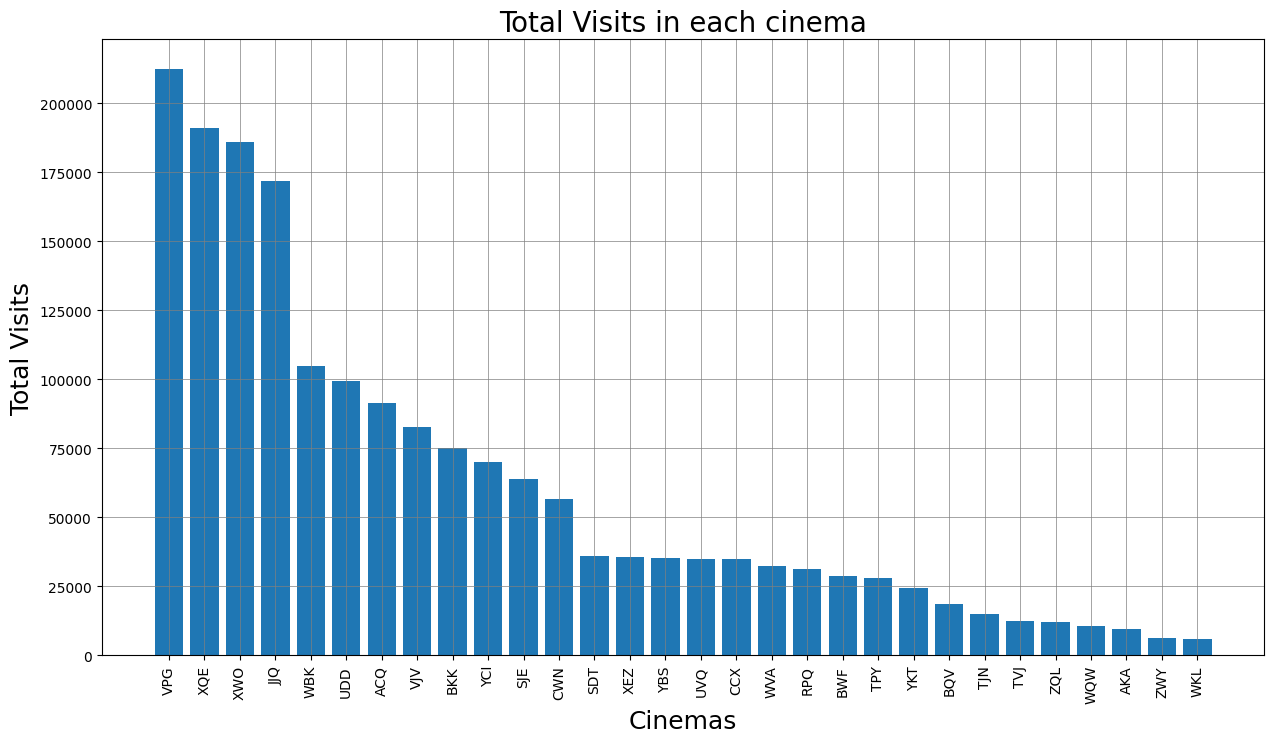

In [39]:
plt.figure(figsize=(15,8))

x_pos= np.arange(len(weeklyvisitors.columns))
plt.bar(x_pos,weeklyvisitors.sum().sort_values(ascending=False),align='center')
plt.xticks(x_pos,weeklyvisitors.columns,rotation=90)
plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='gray')
plt.xlabel('Cinemas',fontsize=18)
plt.ylabel('Total Visits',fontsize=18)
plt.title('Total Visits in each cinema',fontsize=20)
plt.show()

With the help of above visualisation, we can create a rough boundry for each cinema volume group.

In [40]:
categories = ['High', 'Medium', 'Low', 'Very Low']
categories_selected = [[] for i in range(len(categories))]
total_visitors_all = weeklyvisitors.sum()
for name in weeklyvisitors.columns:
    total_visitors = weeklyvisitors[name].sum()
    if total_visitors > 150000:
        category = 0
    elif total_visitors > 50000 and total_visitors<150000:
        category = 1
    elif total_visitors > 25000 and total_visitors<50000:
        category = 2
    else:
        category = 3
    categories_selected[category].append(name)
    #print('Cinema ' + name + ' is ' + categories[category] + ' volume')

Using Bar plots to visualize each category

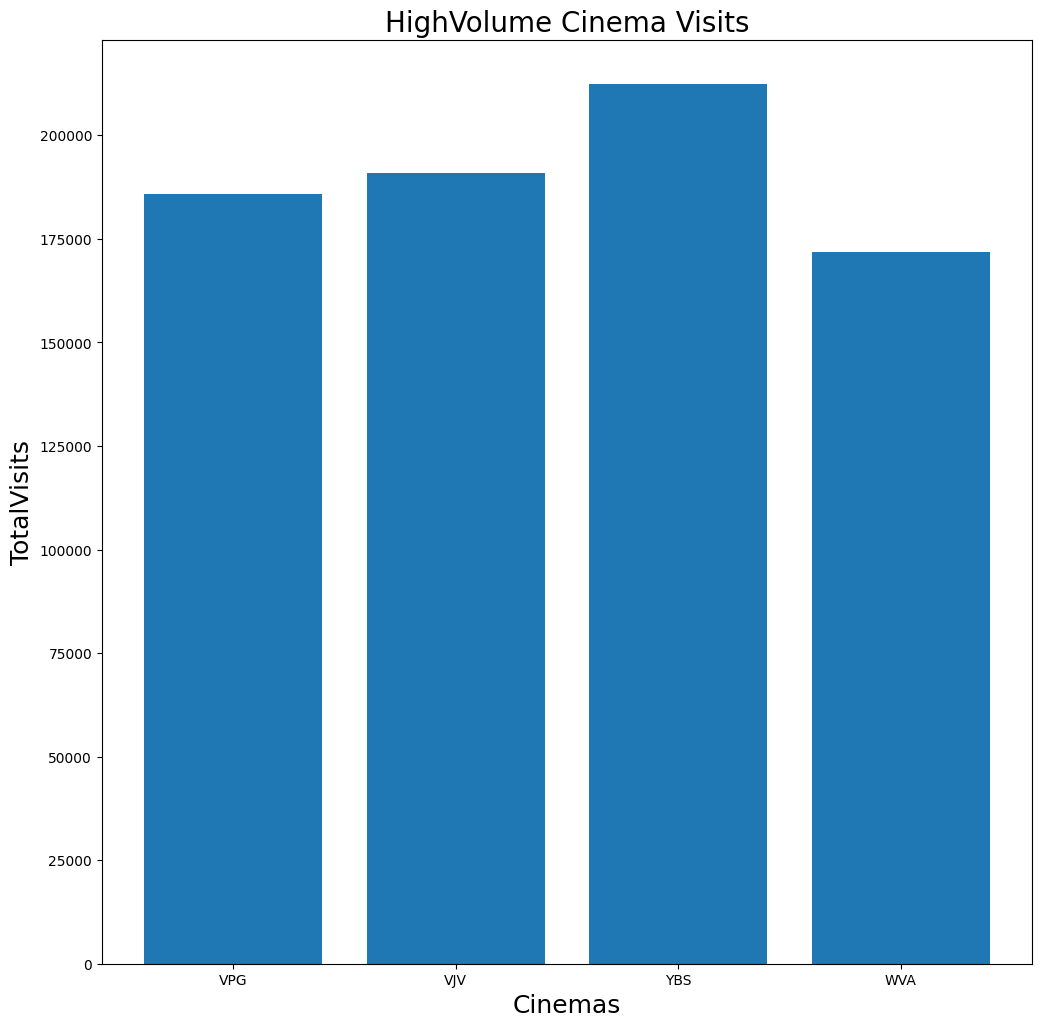

<Figure size 800x800 with 0 Axes>

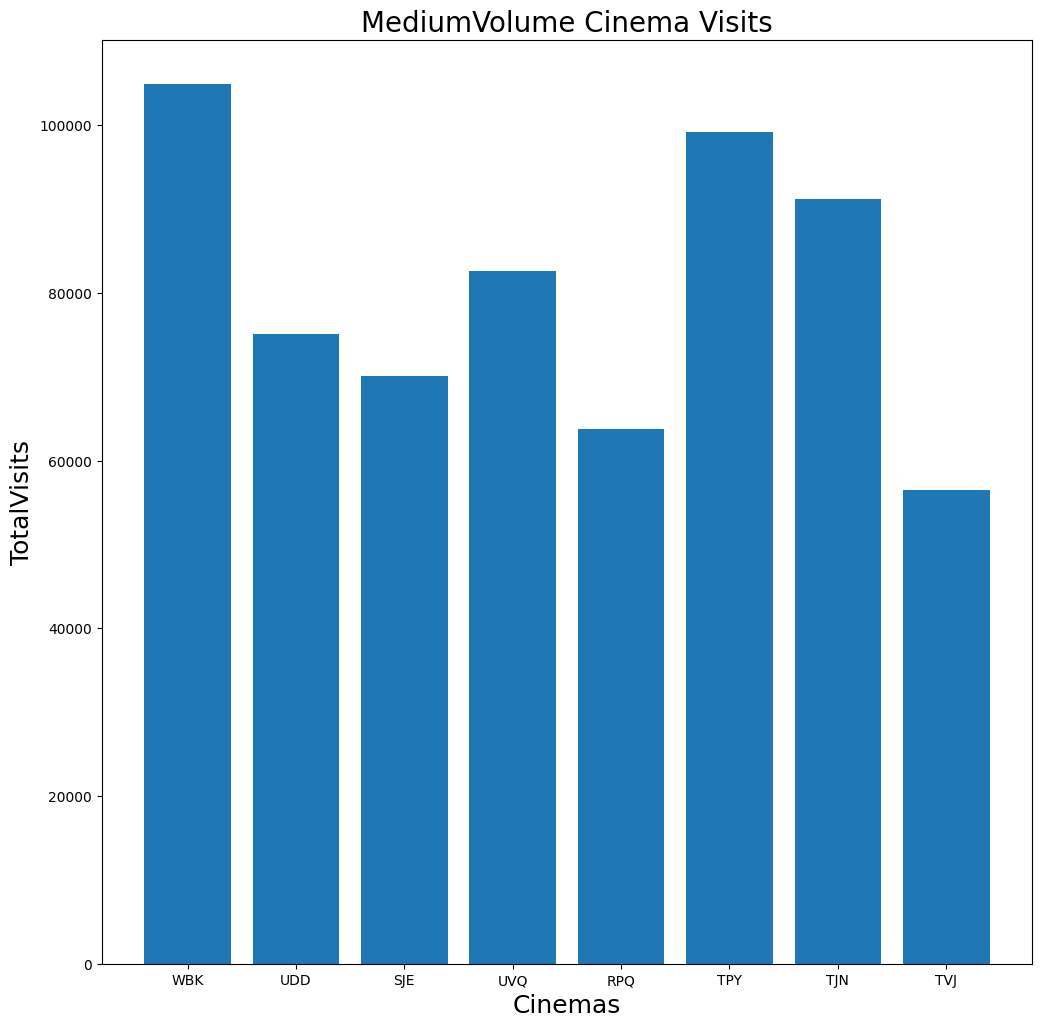

<Figure size 800x800 with 0 Axes>

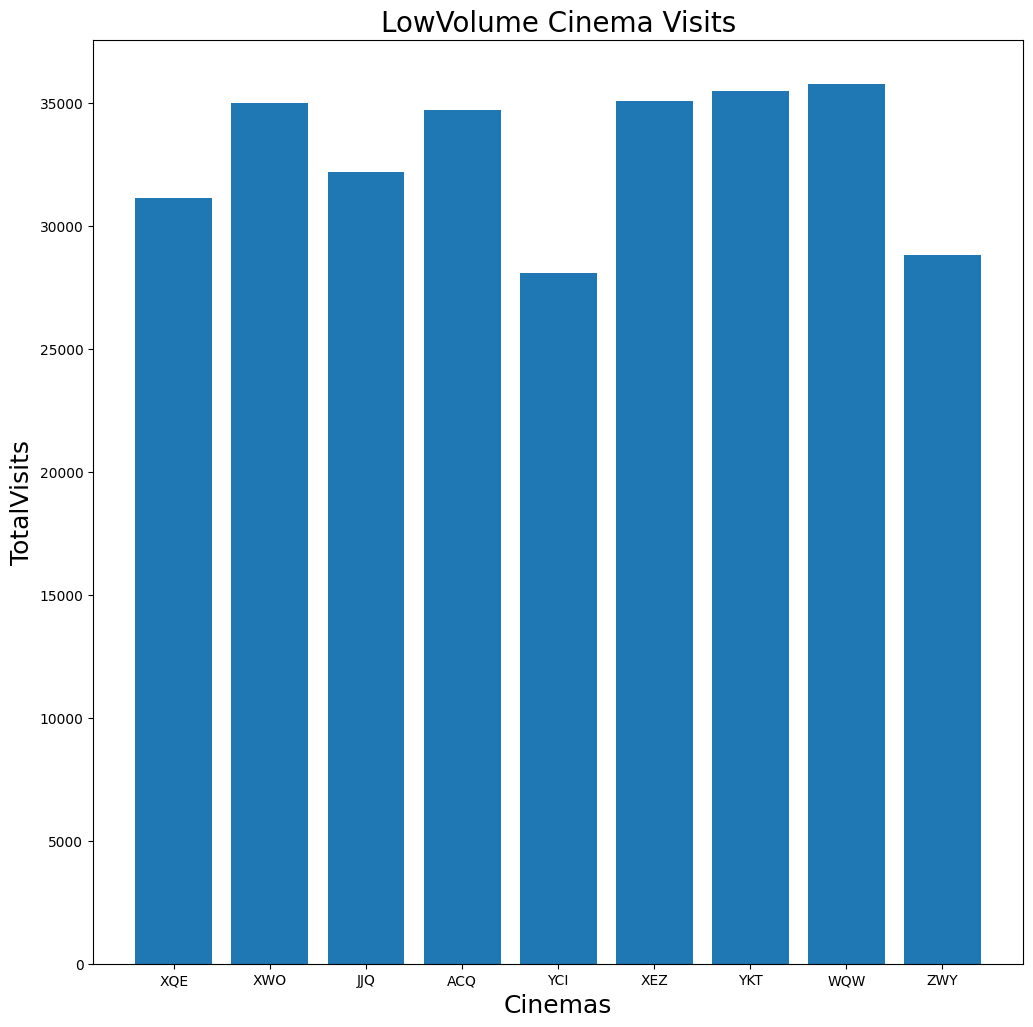

<Figure size 800x800 with 0 Axes>

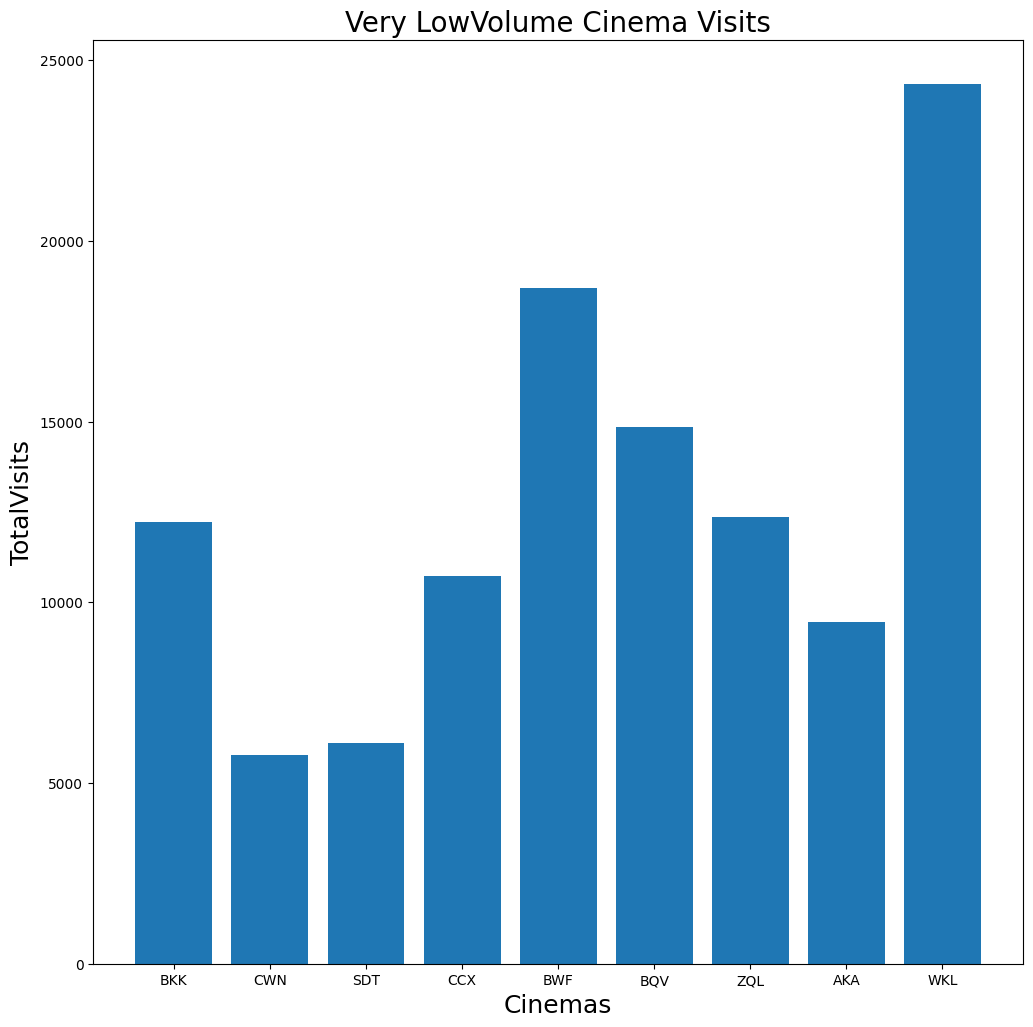

<Figure size 800x800 with 0 Axes>

In [41]:
for i,selected in enumerate(categories_selected):

  plt.figure(figsize=(12,12))
  x_pos=np.arange(len(weeklyvisitors[selected].columns))
  plt.bar(x_pos,weeklyvisitors[selected].sum(),align='center')
  plt.xticks(x_pos, weeklyvisitors[selected].columns)
  plt.xlabel('Cinemas',fontsize=18)
  plt.ylabel('TotalVisits',fontsize=18)
  plt.title(categories[i]+ 'Volume Cinema Visits',fontsize=20)
  plt.show()

  plt.figure(figsize=(8,8))
# For Line plot


# Show the plot
plt.show()

Using Line plot for each cinema group to find out which cinemas were opened or closed at the later stages of the recorded period. Here to smooth out the noise, period of 4 i.e., average of four datapoints, average of approximately one month is used as rolling average!

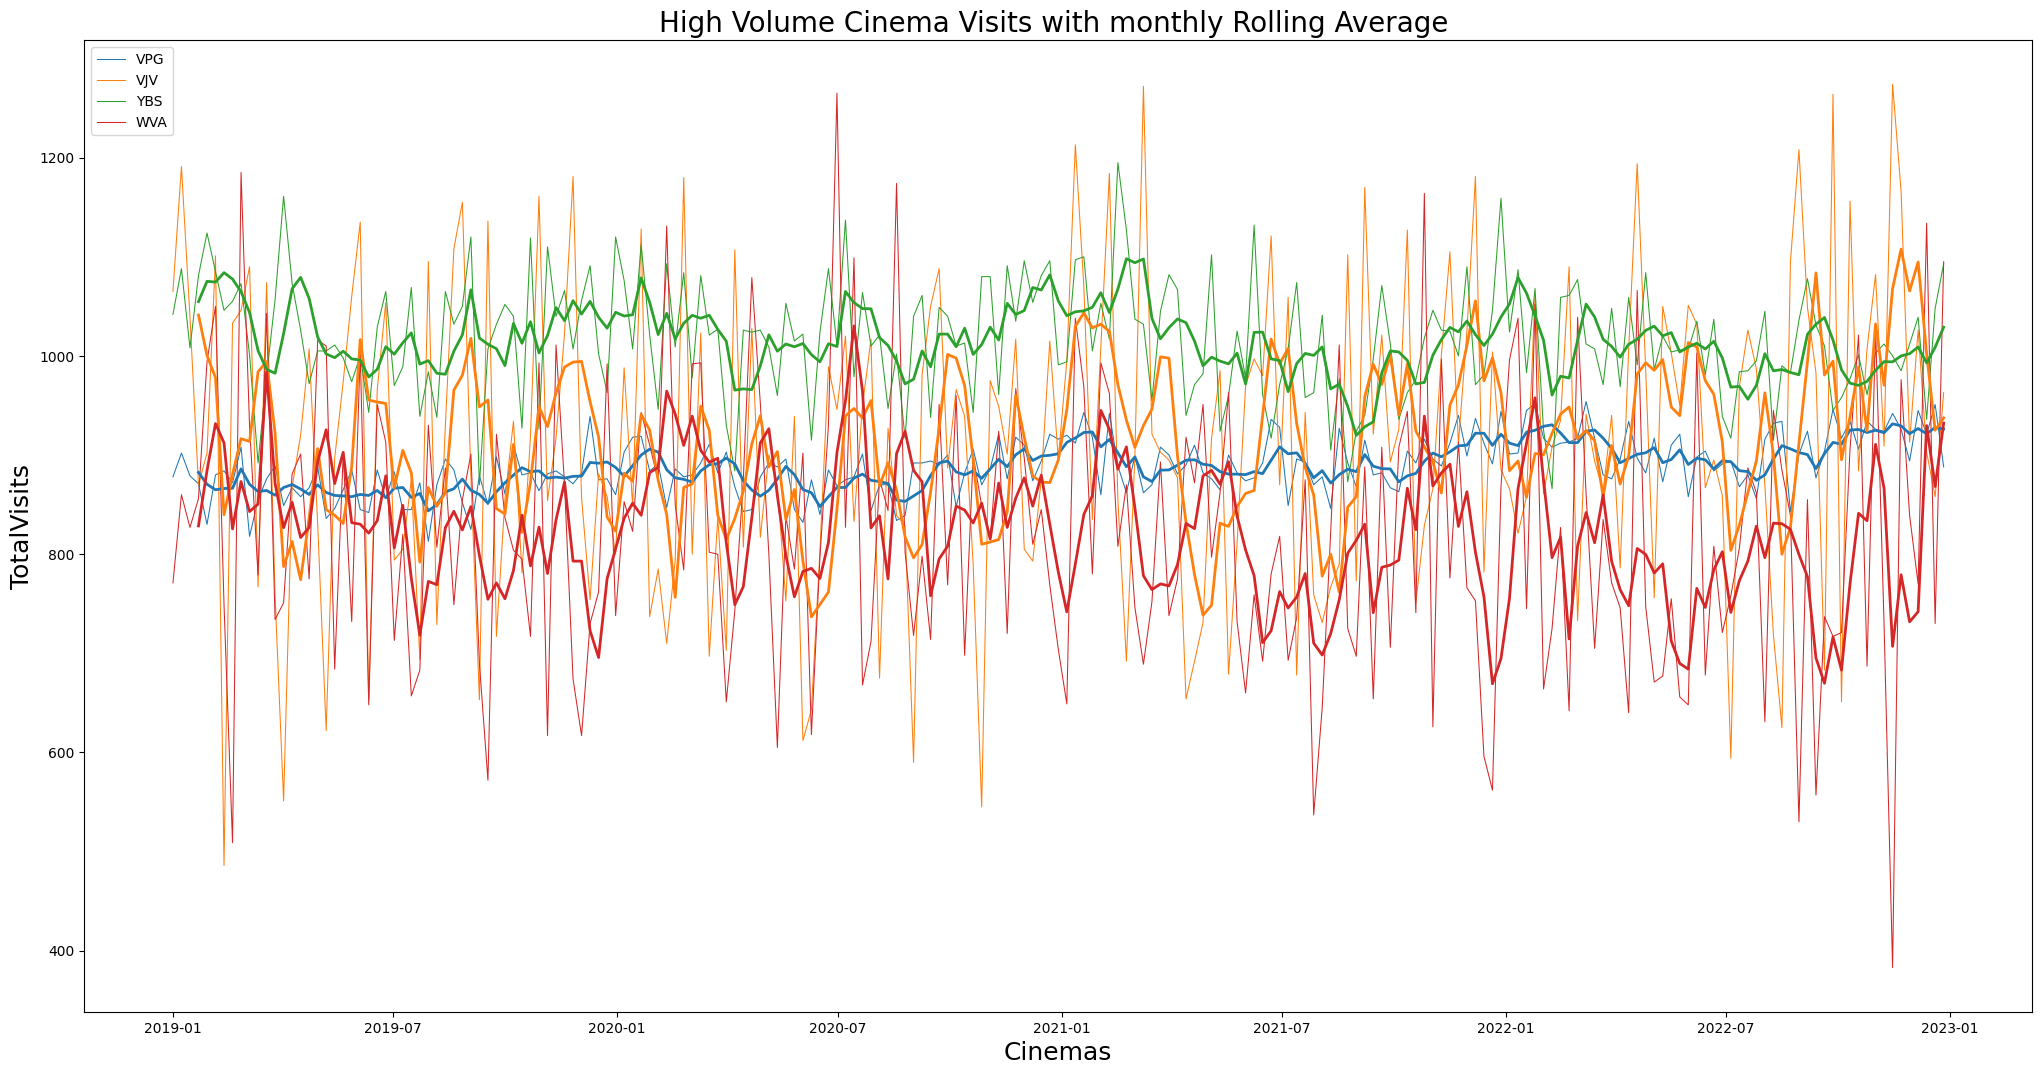

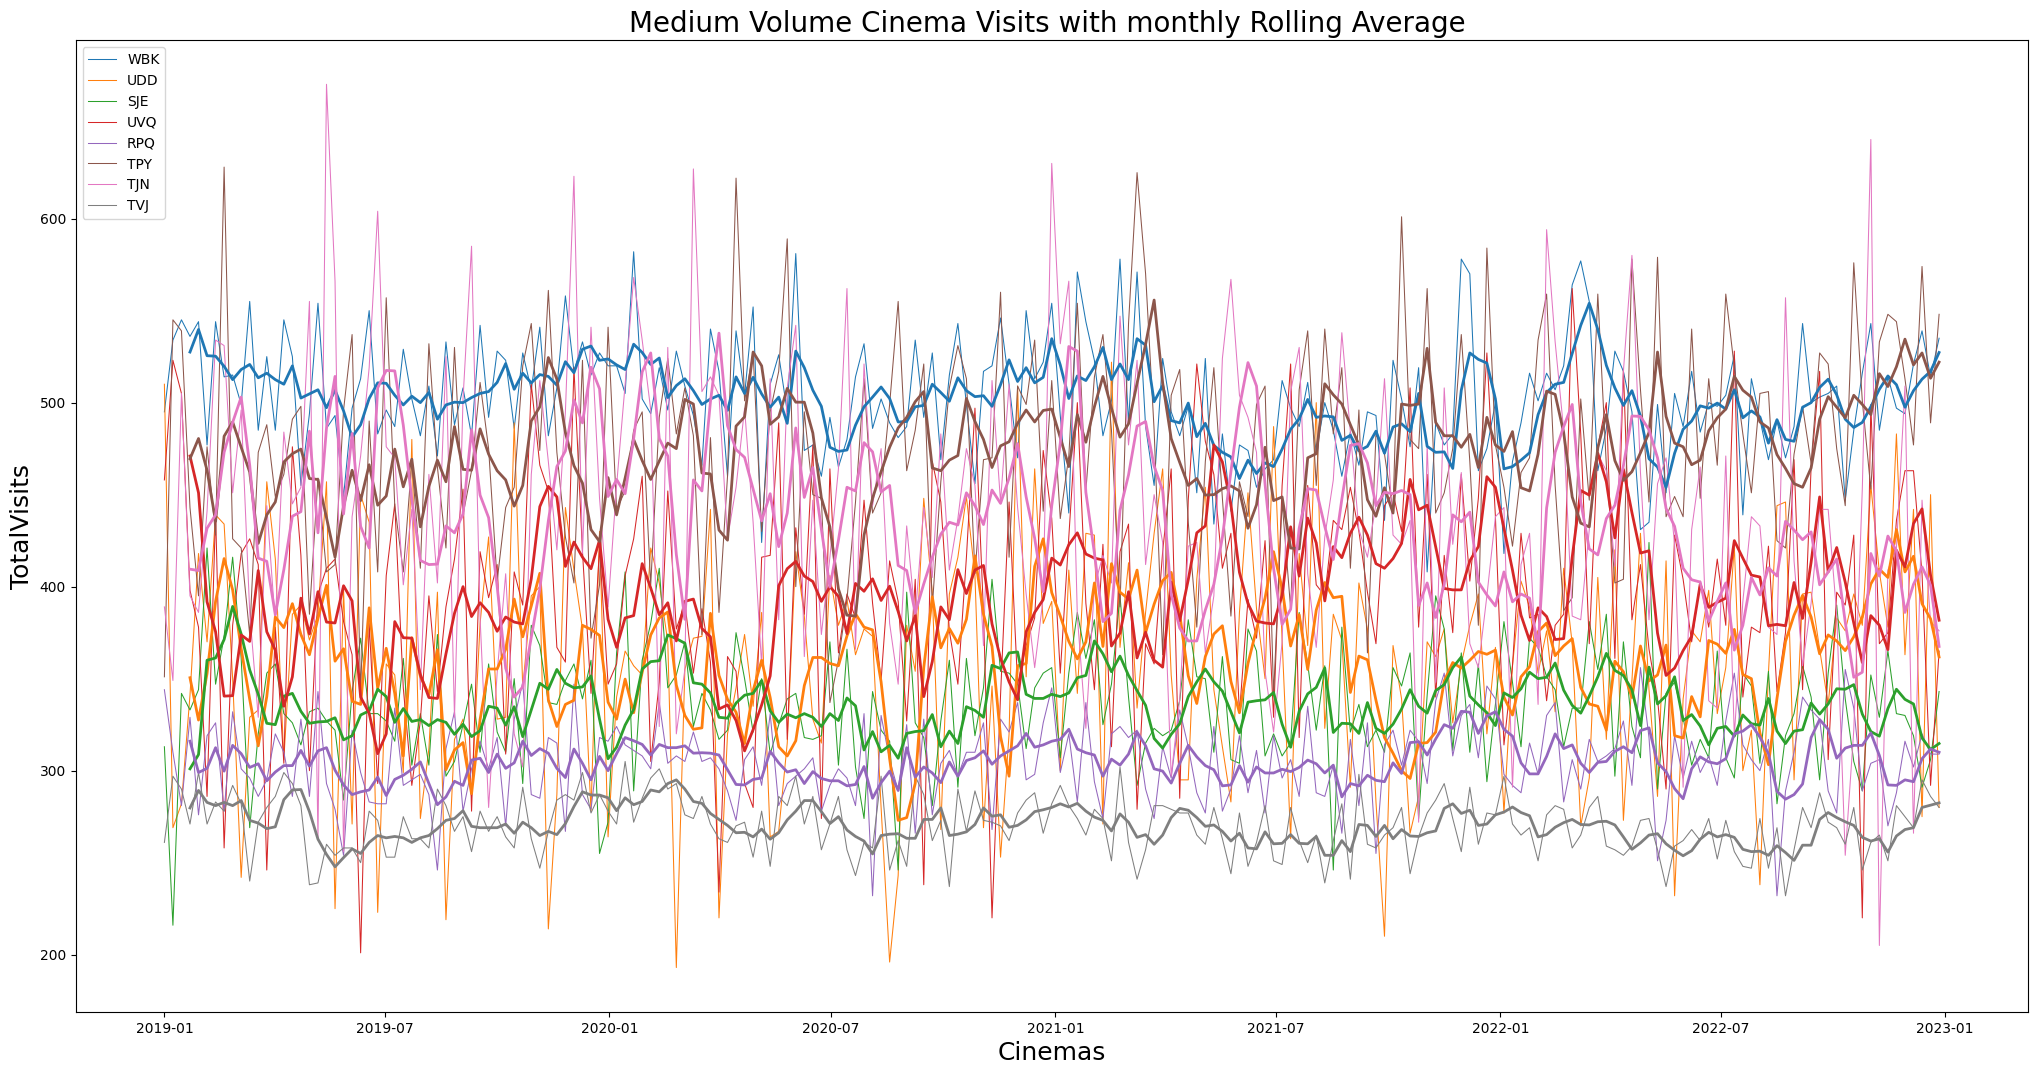

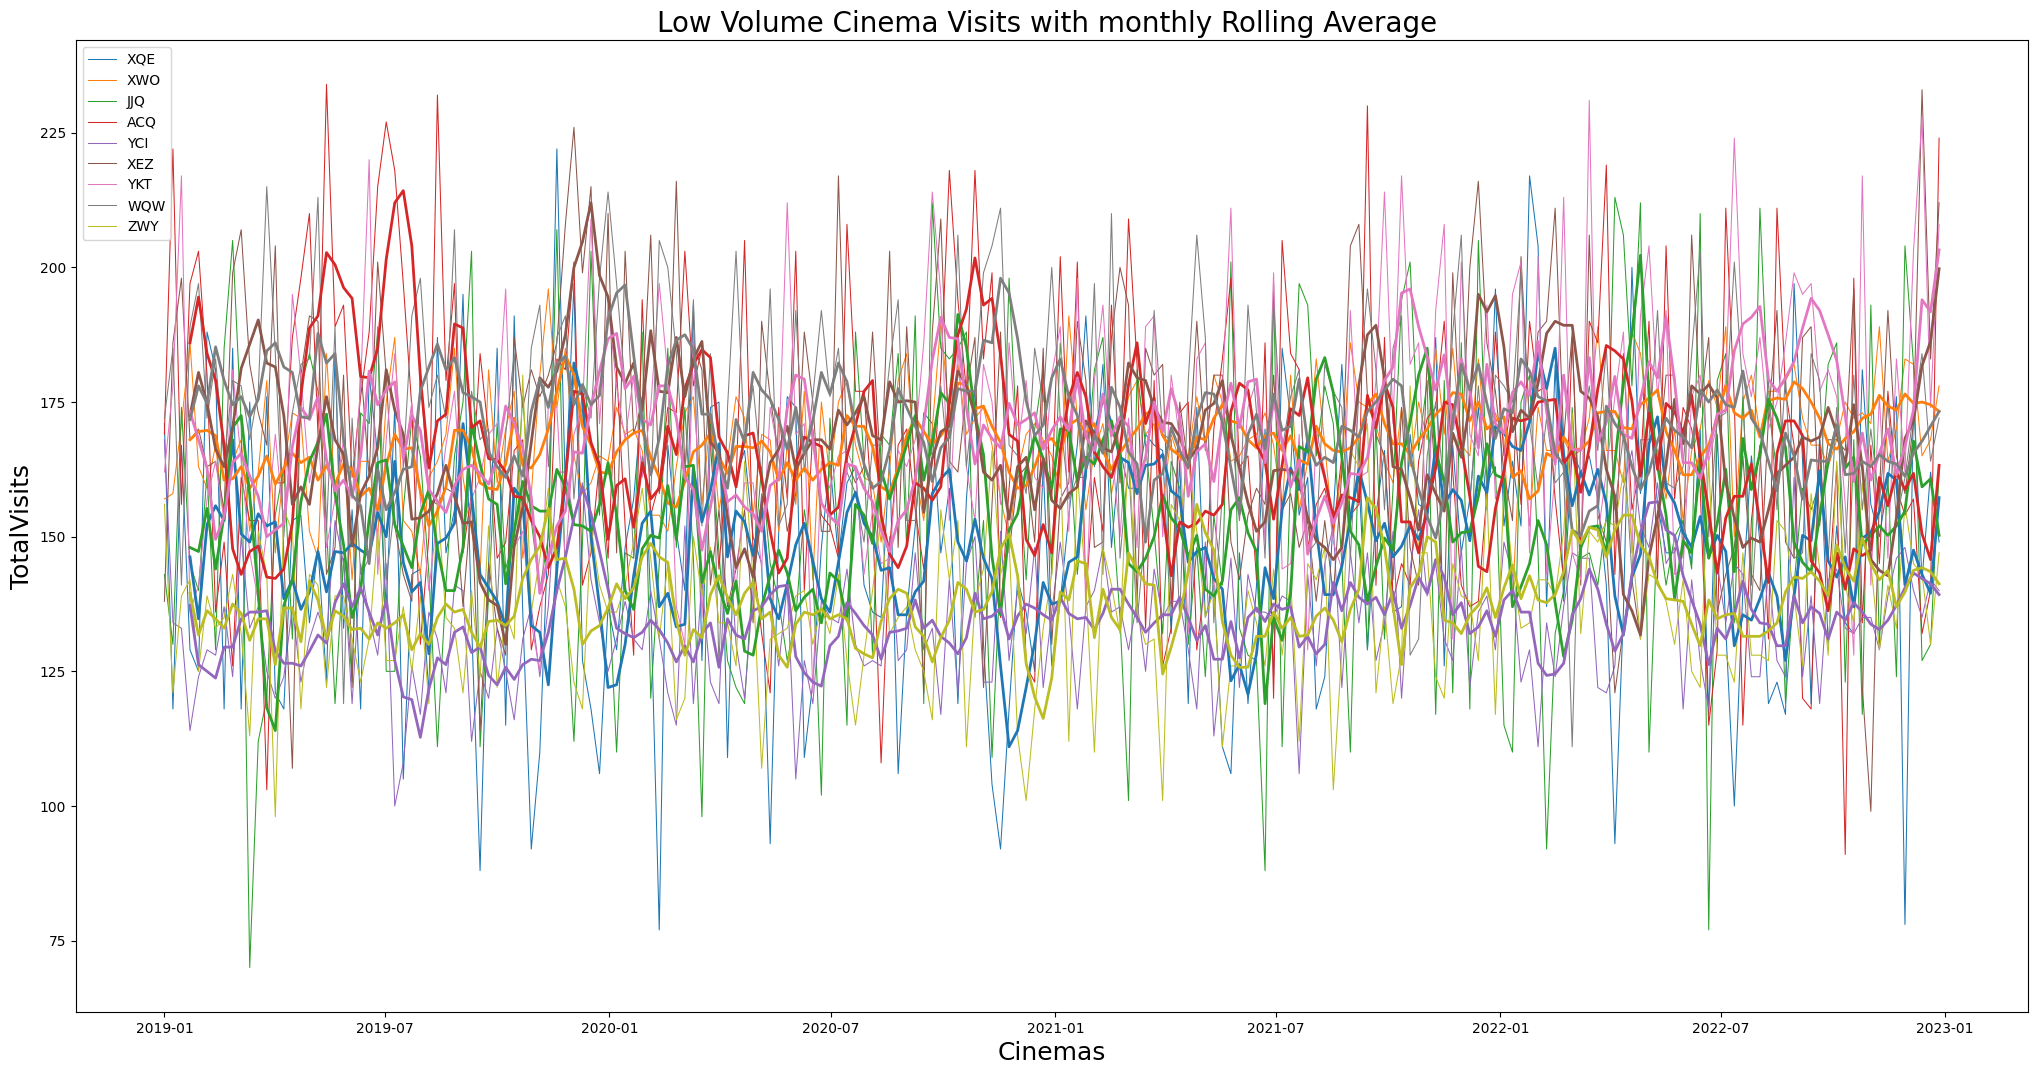

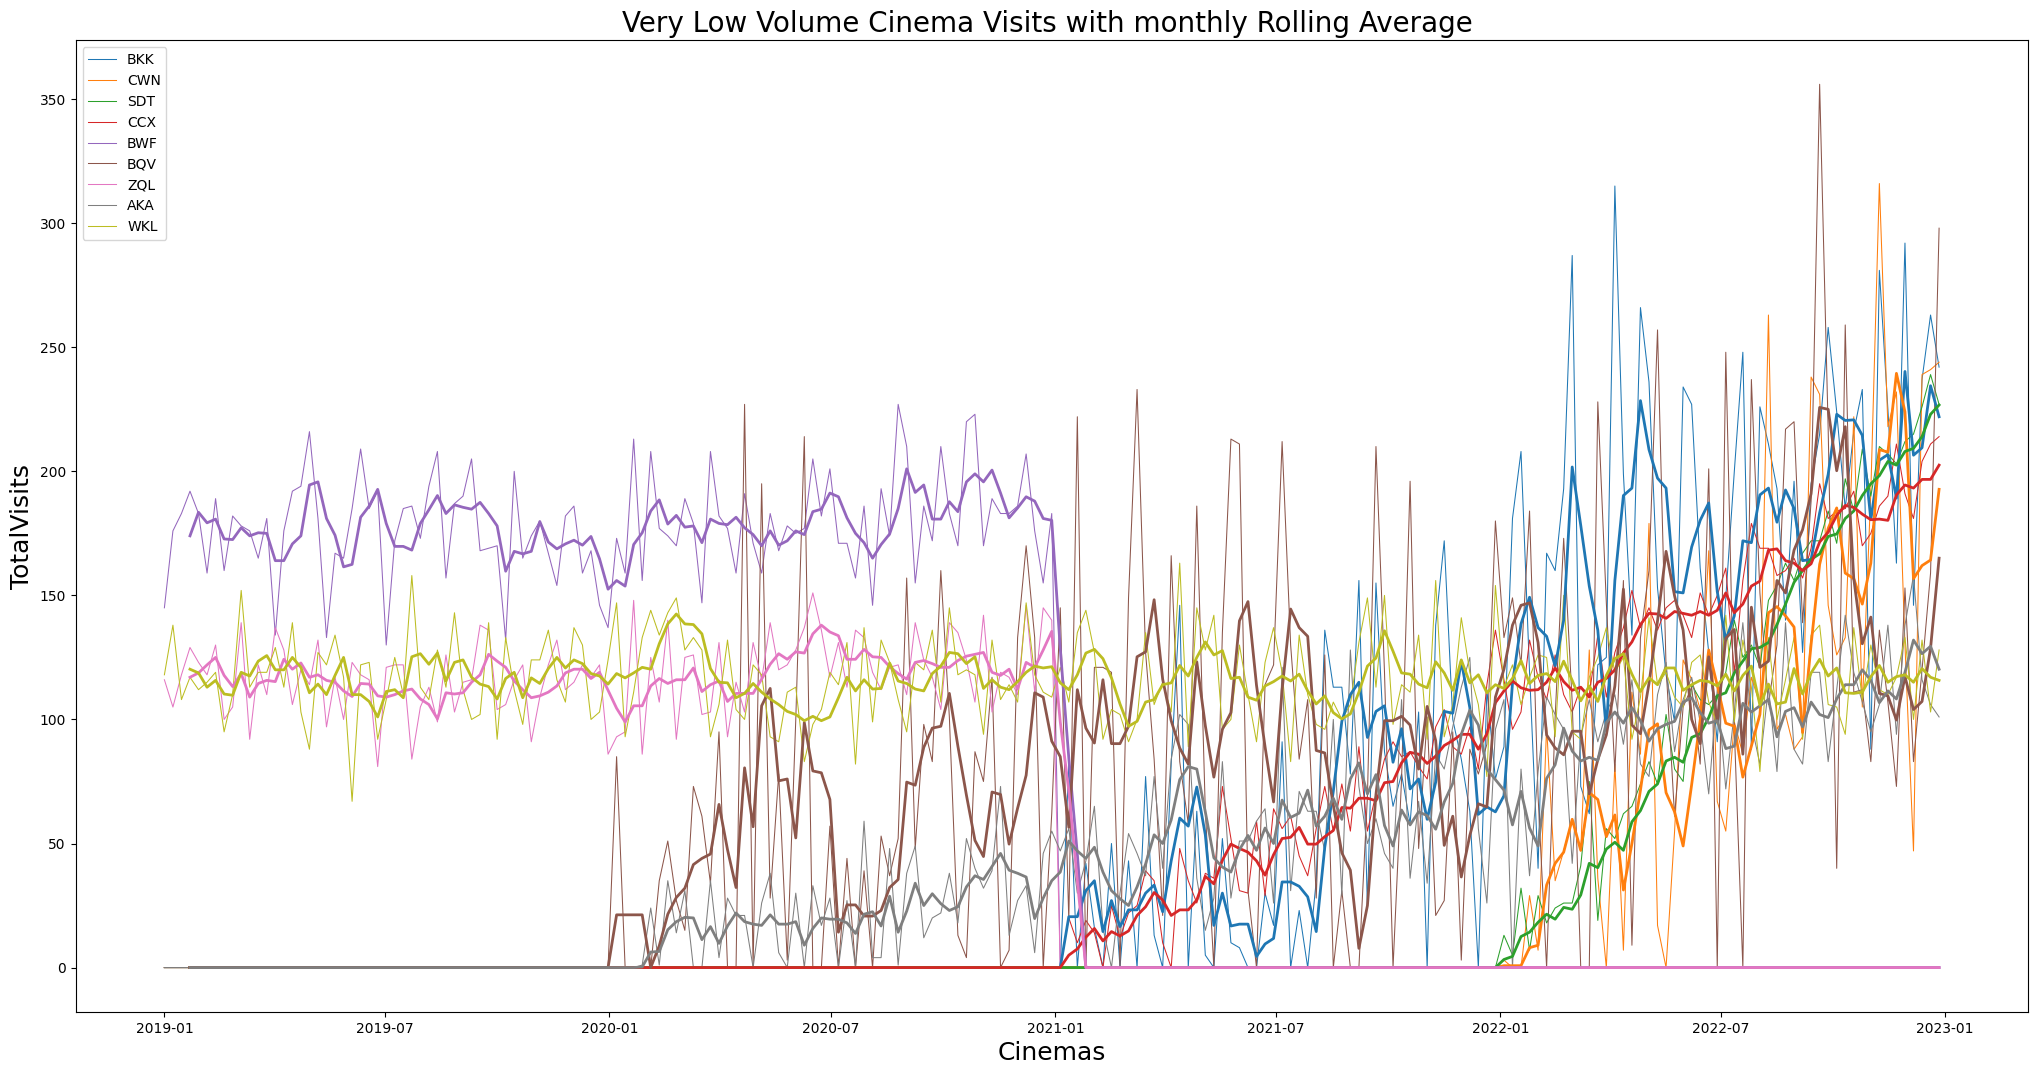

In [42]:
period = 4
rolling_average = weeklyvisitors.rolling(window=period).mean()

for i,selected in enumerate(categories_selected):
    plt.figure(figsize=(40,40))
    # For Line plot
    plt.plot(weeklyvisitors[selected], linewidth=0.75)
    plt.gca().set_prop_cycle(None)
    plt.plot(rolling_average[selected], linewidth=2)
    plt.xlabel('Cinemas',fontsize=18)
    plt.ylabel('TotalVisits',fontsize=18)
    plt.title(categories[i]+ ' Volume Cinema Visits with monthly Rolling Average ',fontsize=20)
    plt.tight_layout()
    plt.legend(selected, loc=2)
    plt.gcf().set_size_inches(20,10)
    # Show the plot
    plt.show()

Cinemas that closed:

BWF and ZQL closed from starting of 2021
BQV opened in late 2019.AKA opened in starting of 2020.
CCX and BKK opened from the starting of 2021
CWN and SDT opened on the same time in late 2021

For checking if any correlation exist betweenn these cinemas, scatter plot is used.

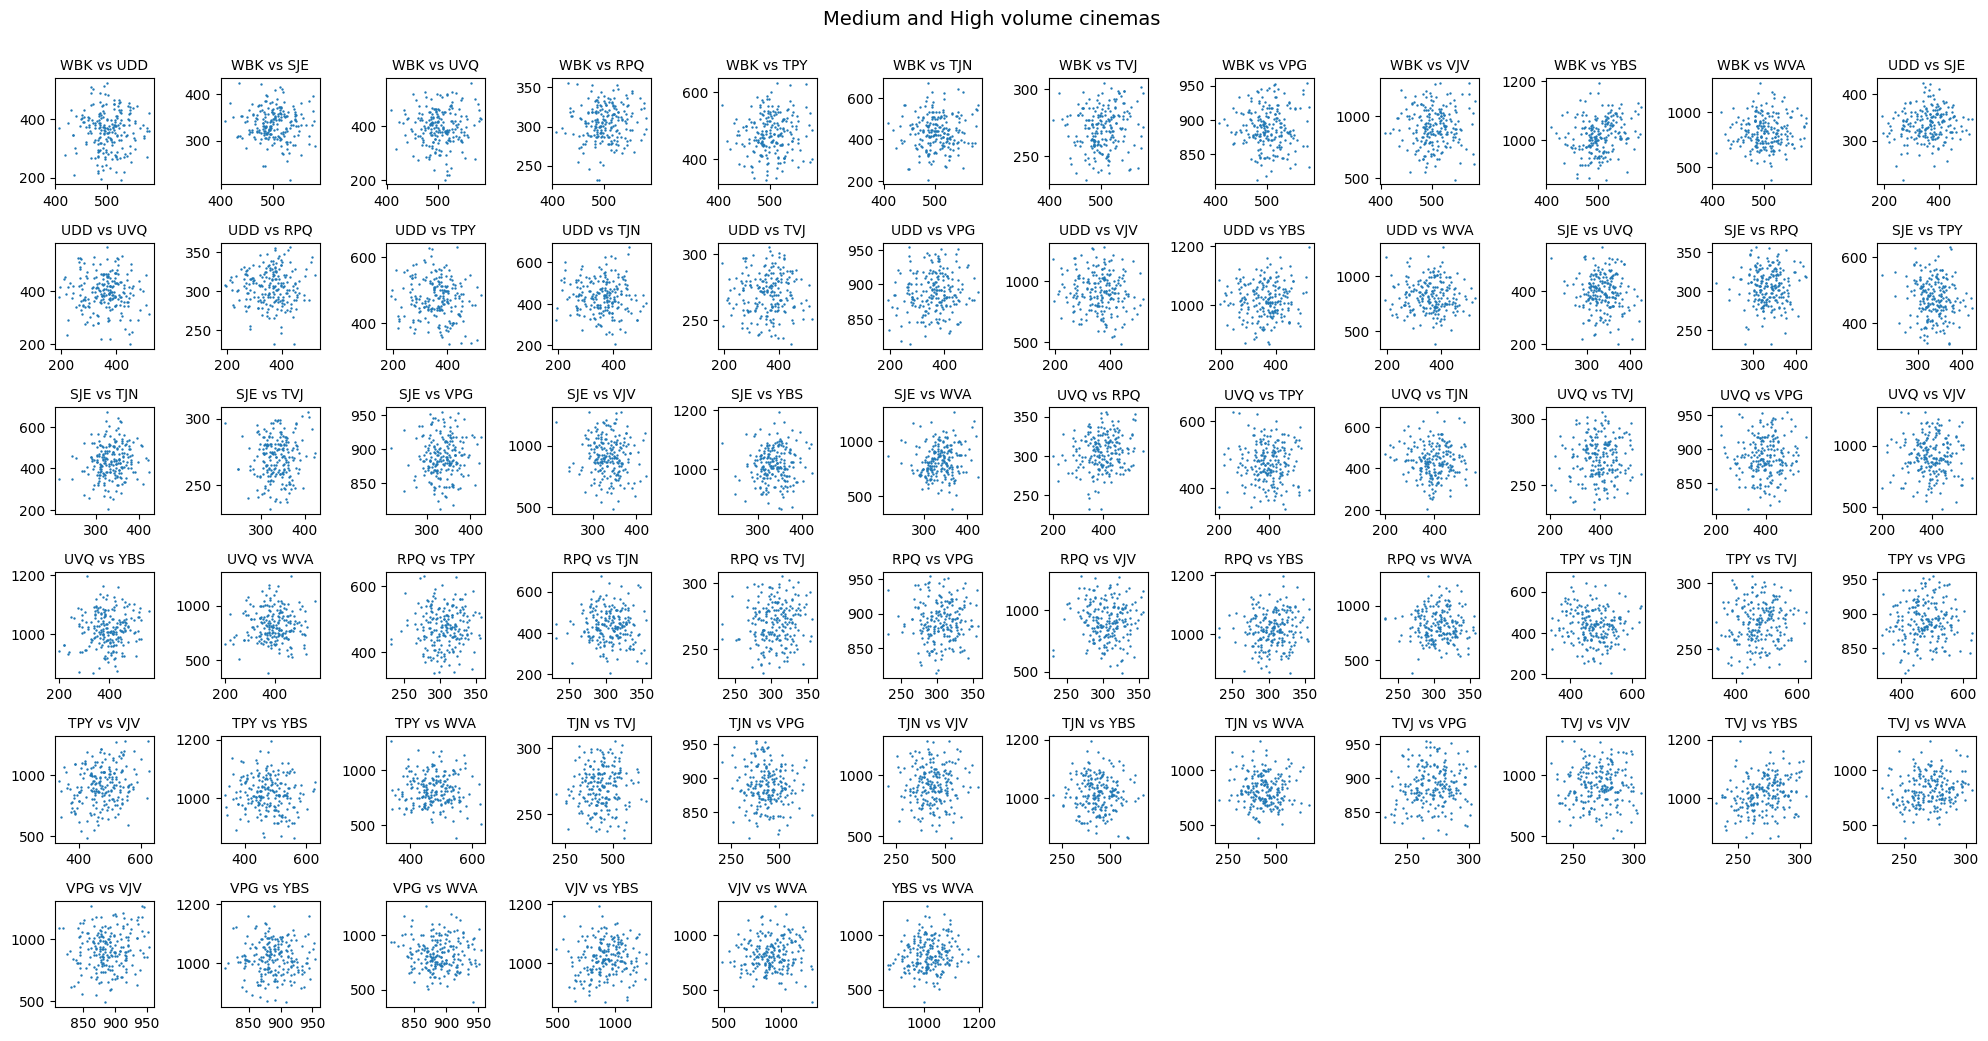

In [43]:

selected=['WBK', 'UDD','SJE','UVQ','RPQ','TPY','TJN','TVJ','VPG', 'VJV', 'YBS', 'WVA'] #for medium and high volume
counter = 1
fig = plt.figure(figsize=(20, 20))
fig.suptitle('Medium and High volume cinemas ', fontsize=14, position=(0.5, 1.0))
for i, name_i in enumerate(selected):
    for j in range(i + 1, len(selected)):
        name_j = selected[j]
        sub = fig.add_subplot(12, 12, counter)
        sub.set_title(name_i + ' vs ' + name_j, fontsize=10)
        sub.scatter(weeklyvisitors[name_i], weeklyvisitors[name_j], s=0.5)
        counter += 1
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.tight_layout()
plt.show()

Again, using heat map for confirmity

            WBK  UDD  SJE  UVQ  RPQ  TPY  TJN  TVJ  VPG   VJV   YBS  WVA
Date                                                                    
2019-01-01  495  510  313  458  344  351  389  261  878  1065  1042  771
2019-01-08  534  269  216  523  310  545  349  297  902  1191  1088  860
2019-01-15  545  282  342  505  281  539  505  290  879  1039  1008  827
2019-01-22  536  341  333  398  329  443  395  271  871   870  1081  856
2019-01-29  544  418  344  378  276  395  386  299  830   902  1124  994


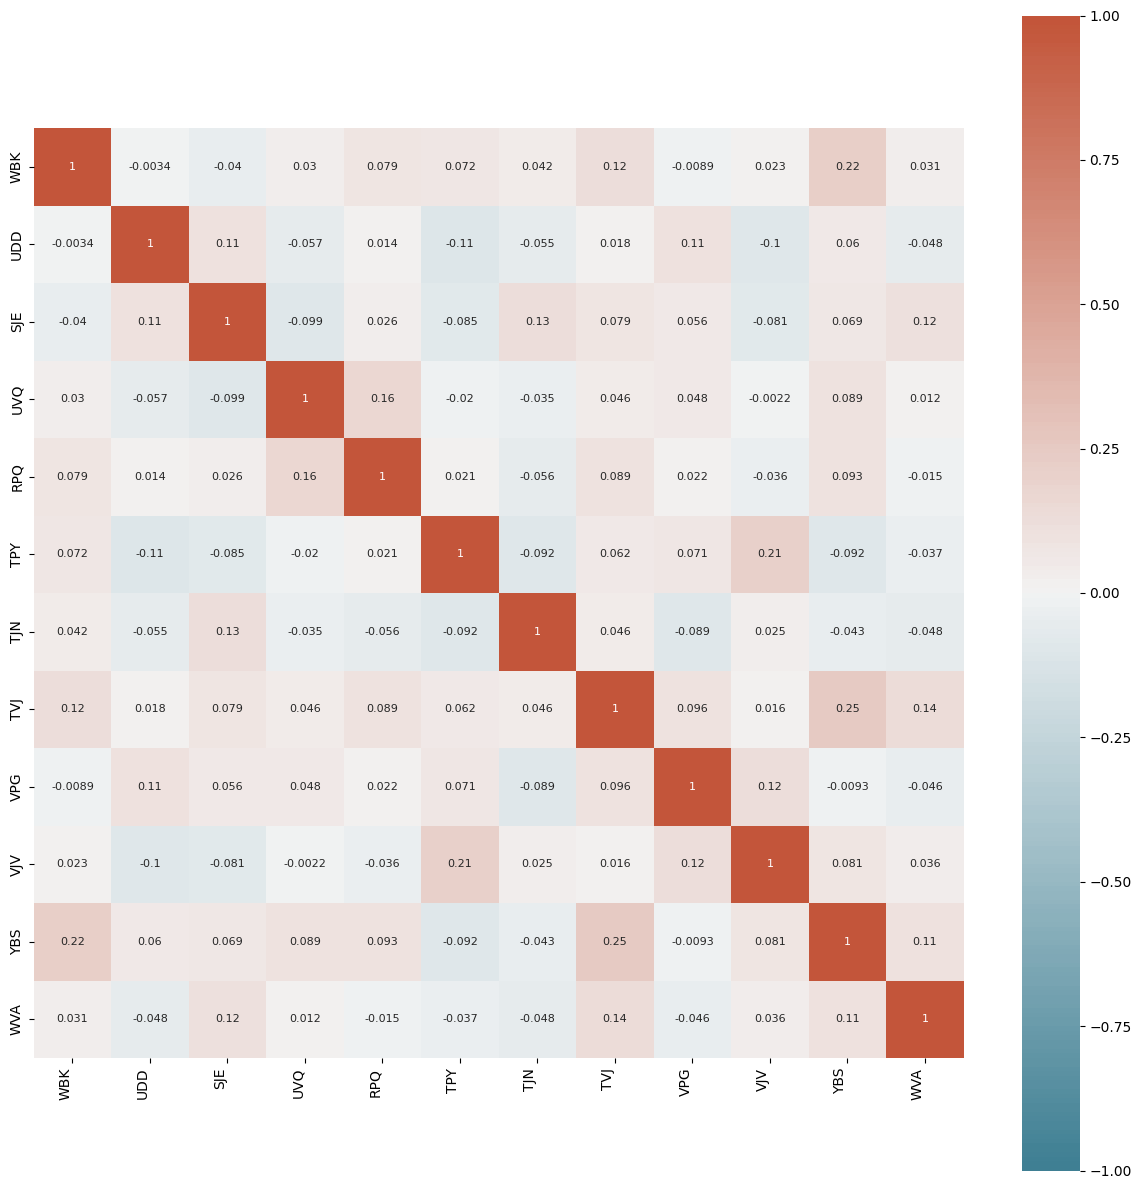

In [44]:
#correlation between high and medium volume cinemas
selected=['WBK', 'UDD','SJE','UVQ','RPQ','TPY','TJN','TVJ','VPG', 'VJV', 'YBS', 'WVA']
print(weeklyvisitors[selected].head())

plt.figure(figsize=(15, 15))
corr = weeklyvisitors[selected].corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

Here, the low and very-low volume cinemas are ignored because they are not our main focus. Moreover, because of the cinemas that were opened/closed on the later stages of period causes correlation to show which should not be considered for data visualisation

Using boxplot to see the spread and outliers in the medium and high volume cinemas:

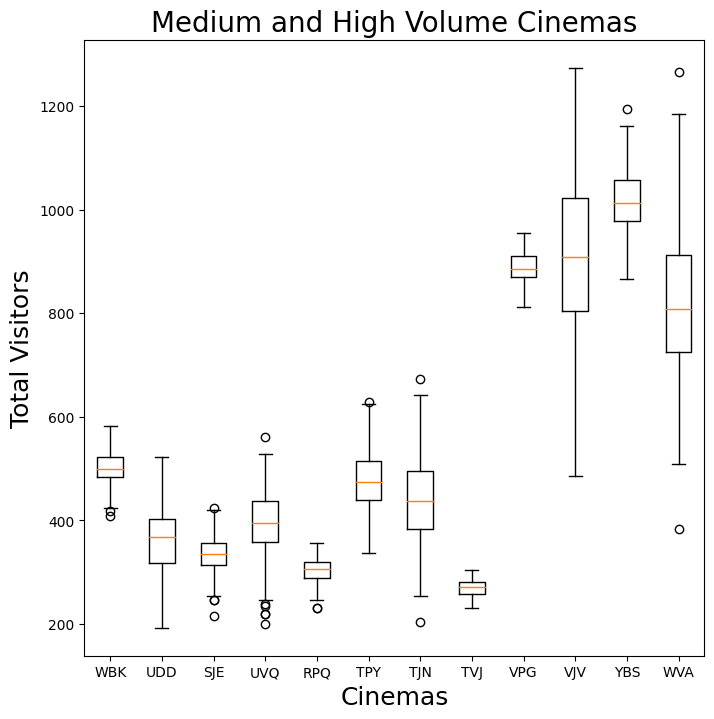

In [45]:
selected=['WBK', 'UDD','SJE','UVQ','RPQ','TPY','TJN','TVJ','VPG', 'VJV', 'YBS', 'WVA']

plt.figure(figsize=(8, 8))
# data[selected].boxplot()
plt.boxplot(weeklyvisitors[selected], labels=selected)
plt.xlabel('Cinemas', fontsize=18)
plt.ylabel('Total Visitors', fontsize=18)
plt.title('Medium and High Volume Cinemas', fontsize=20)
plt.show()



Now, using heat map for summary_df

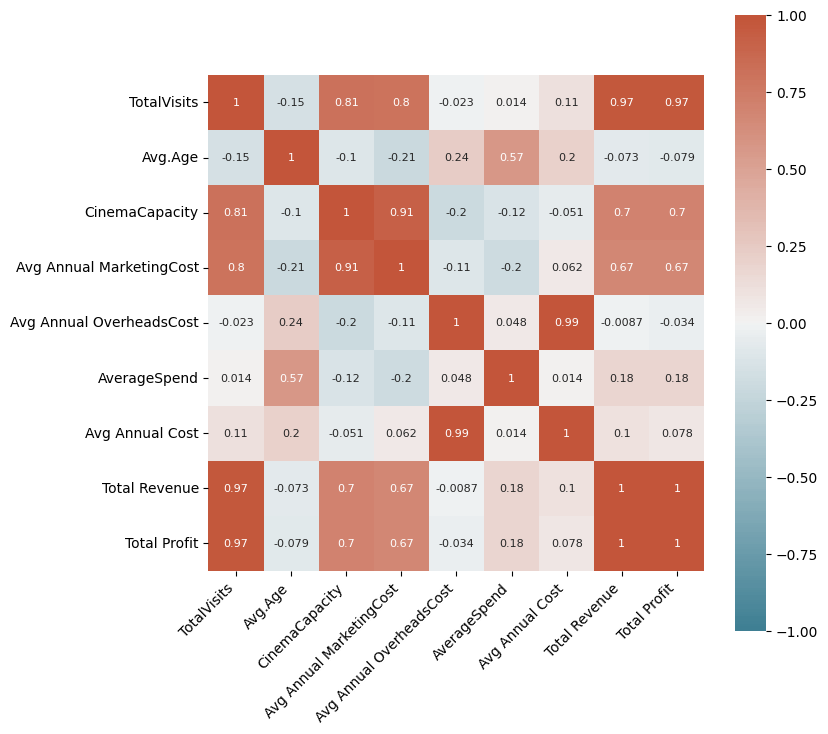

In [46]:
plt.figure(figsize=(8, 8))
corr = summary_df.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

From the heatmap, which is plotted against 7 variables(ignoring the relation between avg annual cost and overhead costs) it can be concluded that Cinema capacity and Avg Annual Marketing Costs has positive correlation with the Total Cinema visits. Similarly, the more amount invested on Marketing, the more Cinema Capacity has increased.

Again verifying the above result through scatter plot:

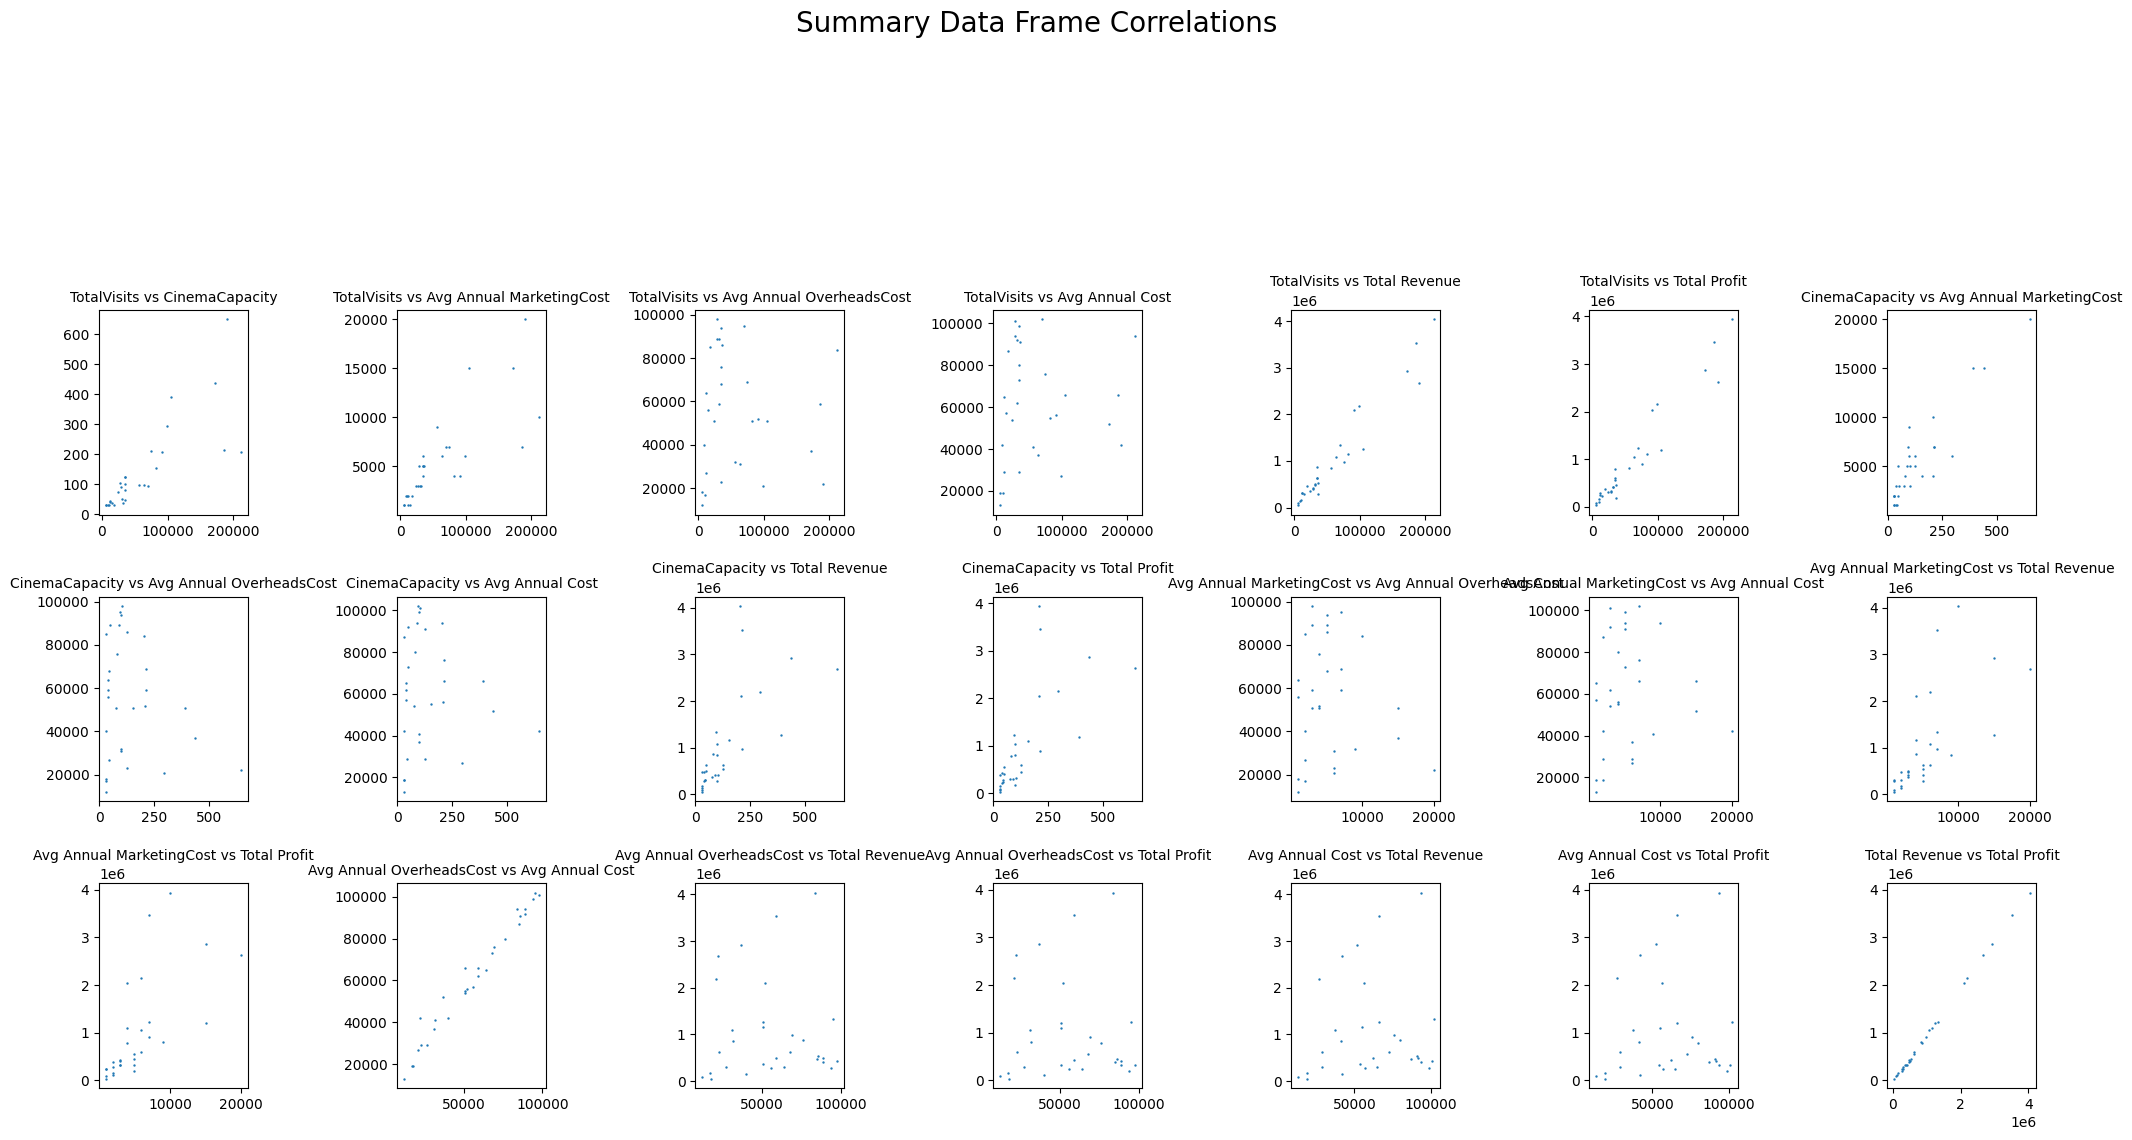

In [47]:
selected = ['TotalVisits', 'CinemaCapacity', 'Avg Annual MarketingCost', 'Avg Annual OverheadsCost','Avg Annual Cost', 'Total Revenue', 'Total Profit']
counter = 1
fig = plt.figure(figsize=(25, 25))
fig.suptitle('Summary Data Frame Correlations', fontsize=20, position=(0.5, 1.0))
plt.subplots_adjust(wspace=1, hspace=0.4)
for i, name_i in enumerate(selected):
    for j in range(i + 1, len(selected)):
        name_j = selected[j]
        sub = fig.add_subplot(7, 7, counter)
        sub.set_title(name_i + ' vs ' + name_j, fontsize=10)
        sub.scatter(summary_df[name_i], summary_df[name_j], s=0.5)
        counter += 1
plt.show()

For Seasonality, using autocorrelation plot for our main focus groups:

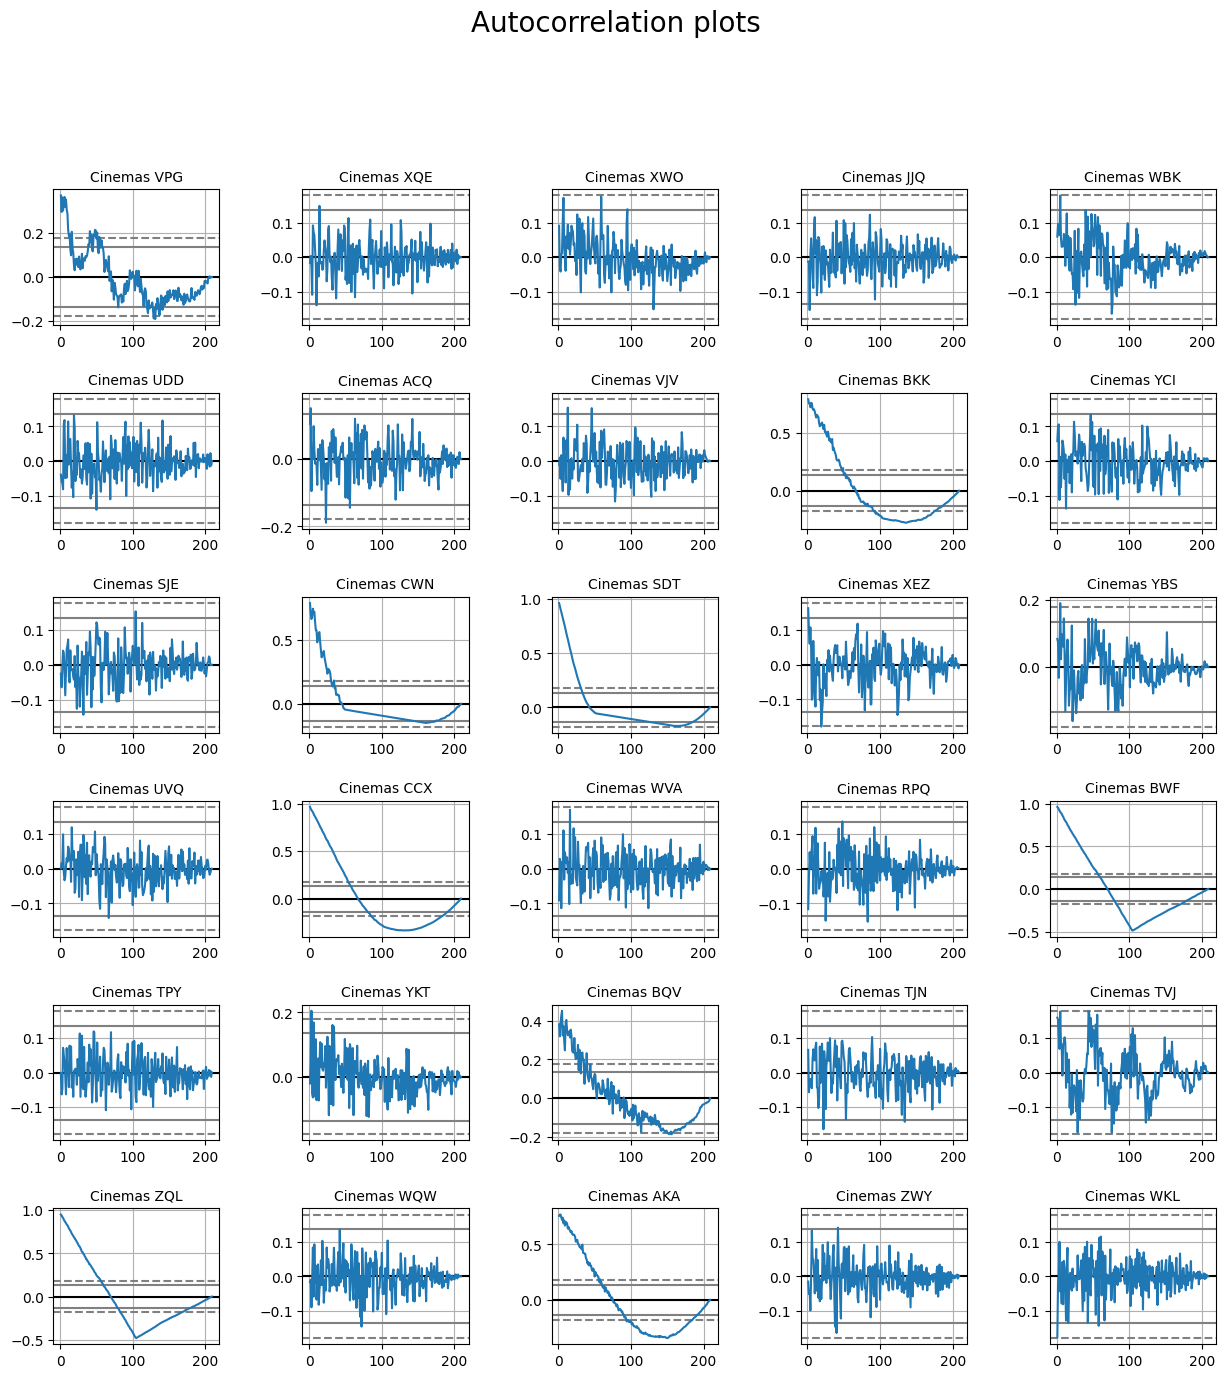

In [48]:
#autocorrelation helps to find seasonality and even correlation
row = 0
col = 0
fig, axes = plt.subplots(figsize=(15, 15), nrows=6, ncols=5)
fig.suptitle('Autocorrelation plots', fontsize=20, position=(0.5, 1.0))
for name in weeklyvisitors.columns:
    sub = pd.plotting.autocorrelation_plot(weeklyvisitors[name], axes[row, col])
    sub.set_title('Cinemas ' + name, fontsize=10)
    sub.xaxis.label.set_visible(False)
    sub.yaxis.label.set_visible(False)
    col += 1
    if col == 5:
        row += 1
        col = 0
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()



From the above subplots we can see that only VPG cinema has some level of seasonality,which will be further explored. However, we can see some similar practice peaks and trough in the two cinemas WBK and YBS

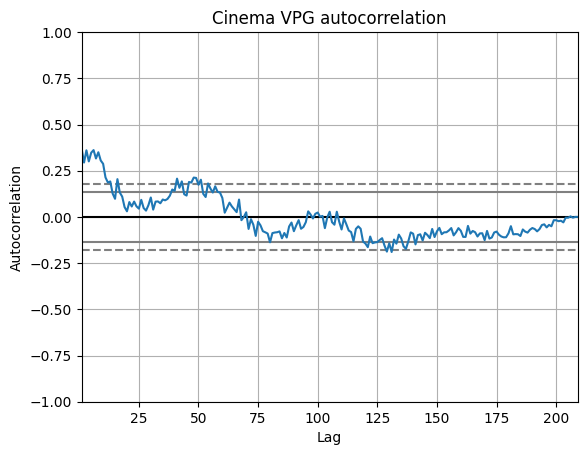

In [49]:
#autocorrelation for VPG


pd.plotting.autocorrelation_plot(weeklyvisitors['VPG'])
plt.title('Cinema VPG autocorrelation')
plt.show()

Again, visualising line correlation for our medium and high cinema groups

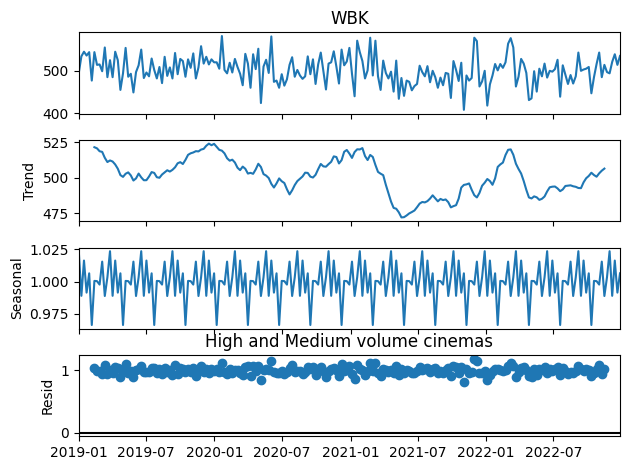

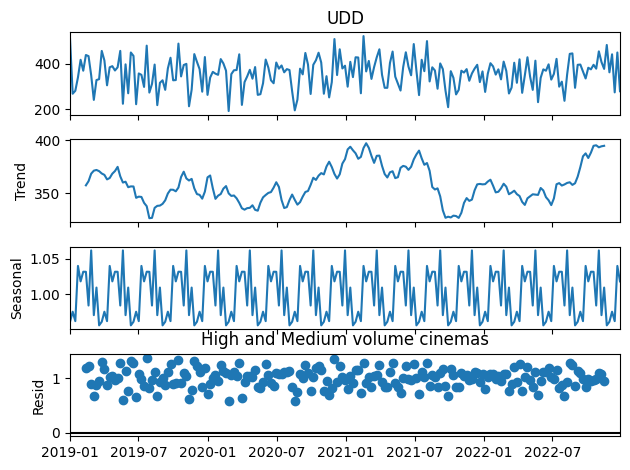

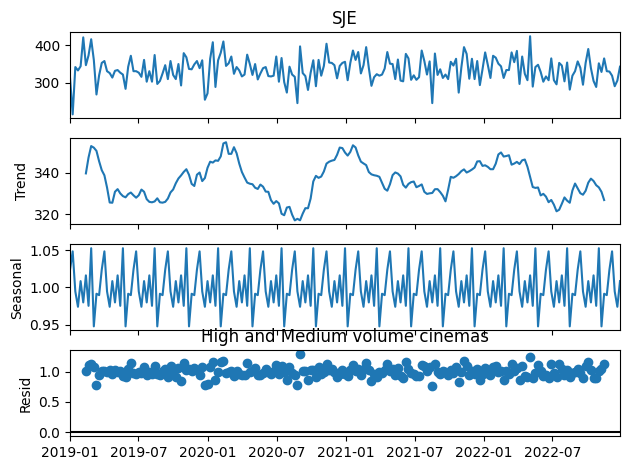

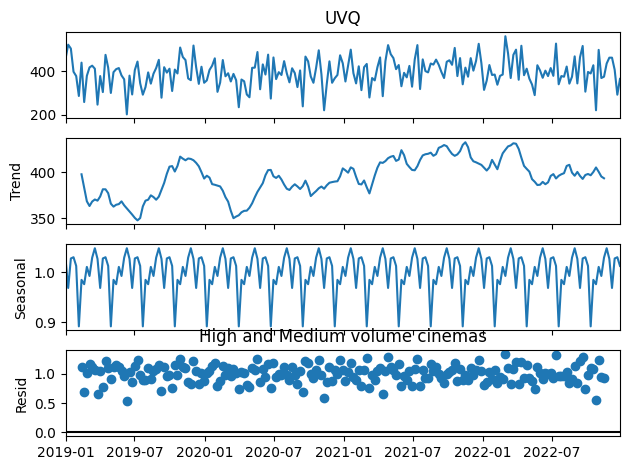

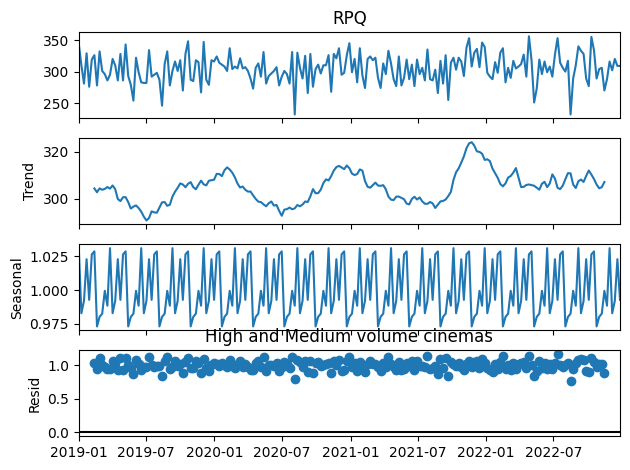

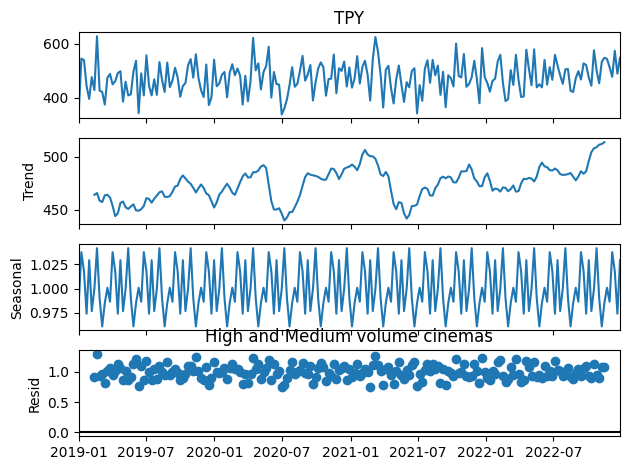

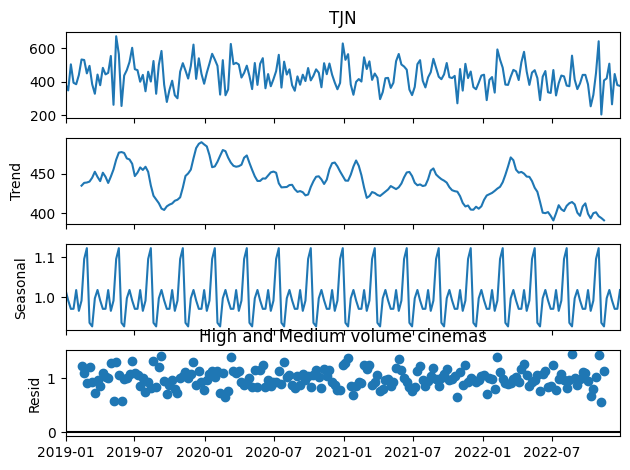

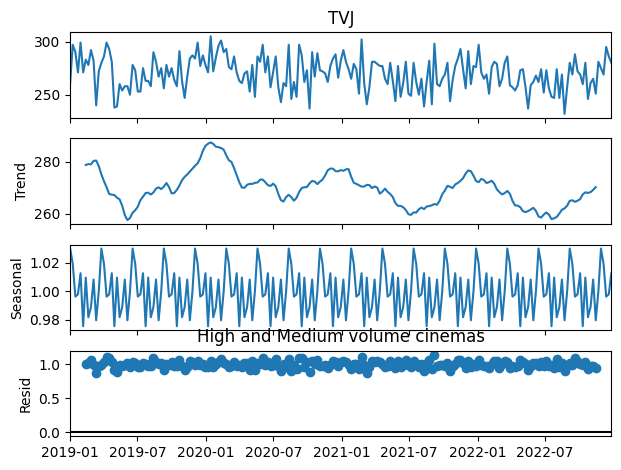

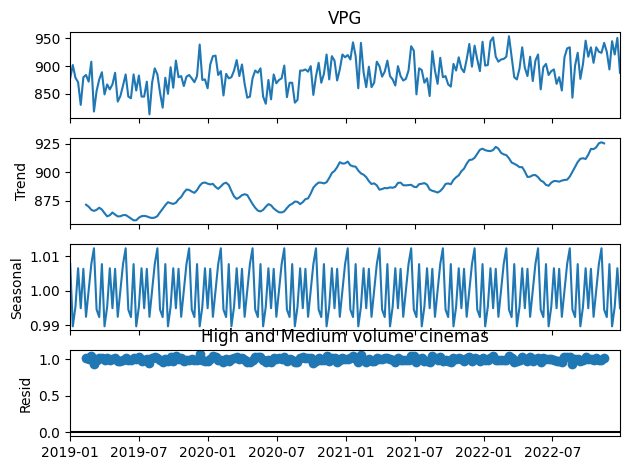

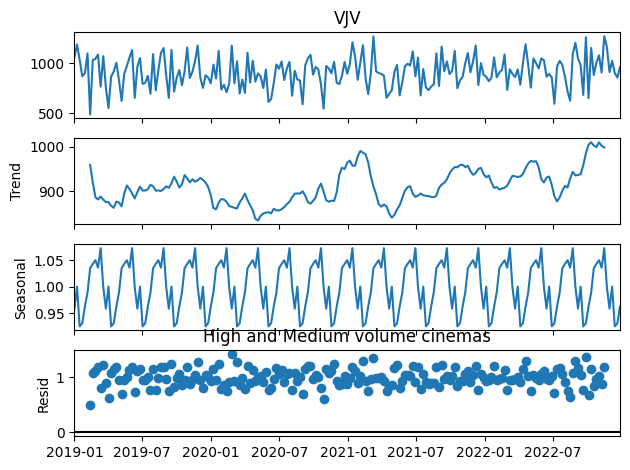

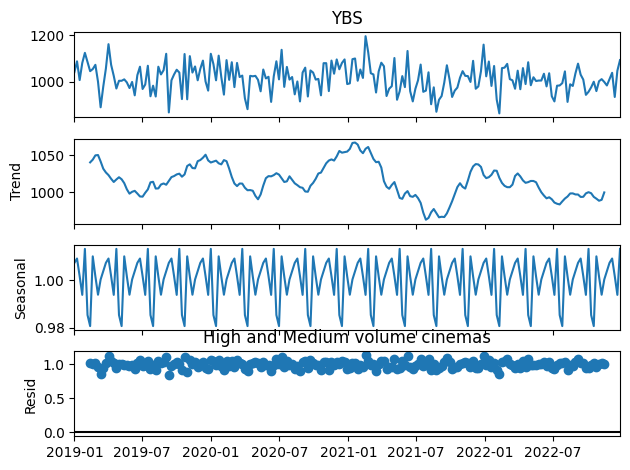

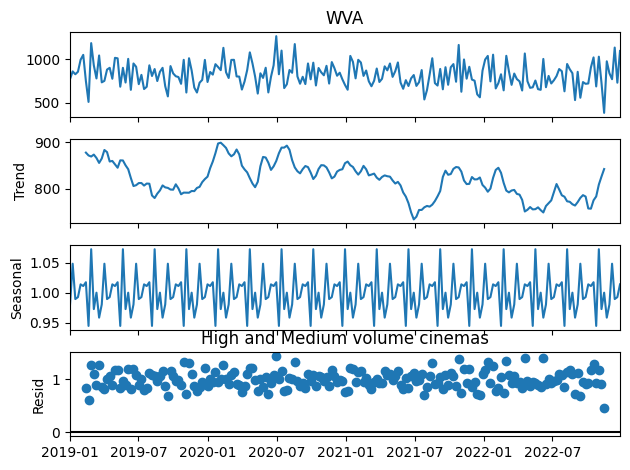

In [50]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
selected=['WBK', 'UDD','SJE','UVQ','RPQ','TPY','TJN','TVJ','VPG', 'VJV', 'YBS', 'WVA']

for name in selected:
    result = seasonal_decompose(weeklyvisitors[name], model='multiplicative', period=12) #four years each year jhikna 12 le divide garya
    result.plot()
    #plt.suptitle('Product ' + name, position=(0.5, 1.0))
    plt.title("High and Medium volume cinemas")
    plt.show()


For our similar cinemas YBS and WBK, checking if there is correlation through scatter plot

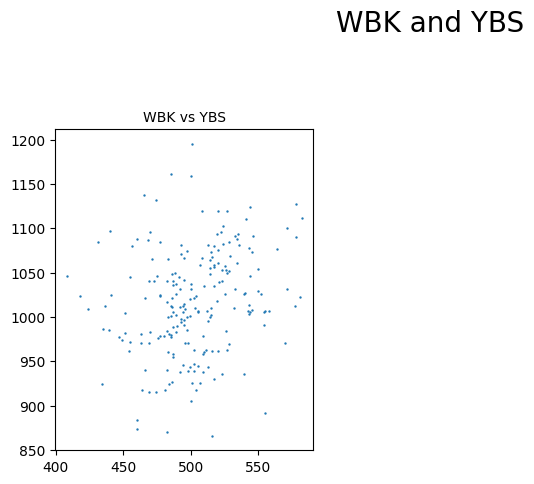

In [51]:
#Correlation between YBS and WBK
selected = ['WBK', 'YBS']
counter = 1
fig = plt.figure(figsize=(10, 10))
fig.suptitle('WBK and YBS', fontsize=20, position=(0.5, 1.0))
plt.subplots_adjust(wspace=1, hspace=0.4)
for i, name_i in enumerate(selected):
    for j in range(i + 1, len(selected)):
        name_j = selected[j]
        sub = fig.add_subplot(2, 2, counter)
        sub.set_title(name_i + ' vs ' + name_j, fontsize=10)
        sub.scatter(weeklyvisitors[name_i], weeklyvisitors[name_j], s=0.5)
        counter += 1
plt.show()

It looks like there is some level of corrleation, but with no signifcant proof. Therefore reconfirming the patterns via line plot

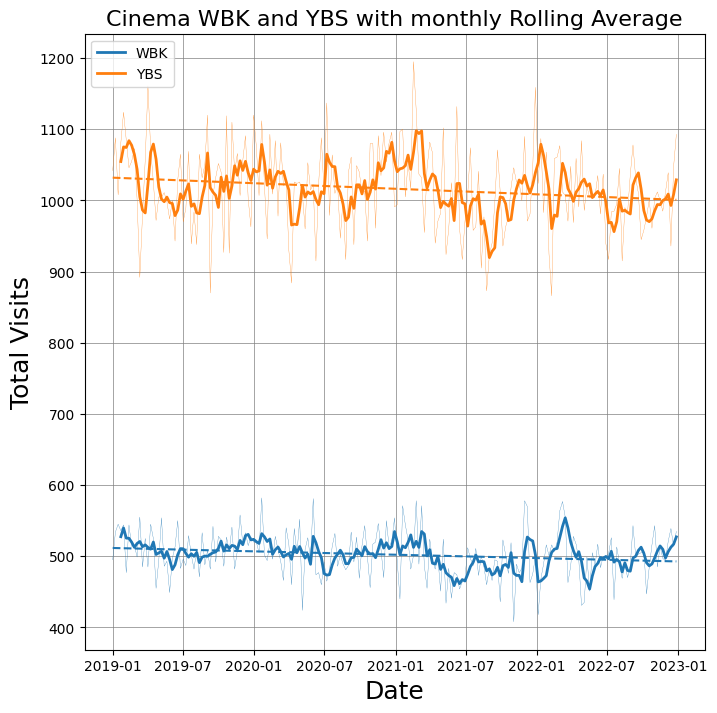

In [52]:
#showing the trendline of WBK and YBS as they have similar trendlines
period = 4
rolling_average = weeklyvisitors.rolling(window=period).mean()

selected = ['WBK', 'YBS']


plt.figure(figsize=(8, 8))
plt.plot(rolling_average[selected], linewidth=2)
plt.gca().set_prop_cycle(None)
plt.plot(weeklyvisitors[selected], linewidth=0.2)
plt.gca().set_prop_cycle(None)
for name in selected:
    x = np.arange(len(weeklyvisitors[name]))
    z = np.polyfit(x, weeklyvisitors[name], 1)
    trend = np.poly1d(z)
    plt.plot(weeklyvisitors.index, trend(x), linestyle='--')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Total Visits', fontsize=18)
plt.title('Cinema WBK and YBS with monthly Rolling Average', fontsize=16)
plt.legend(weeklyvisitors[selected], loc=2)
plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='gray')
plt.show()


There is certainly some similar patterns in these two cinemas as they both witness similar peaks and troughs at different times. This needs to be noted by the company so that they can make some imp decisons

Using scatter plot to justify that high volume cinemas are indeed making more profit as compared to other groups of cinemas

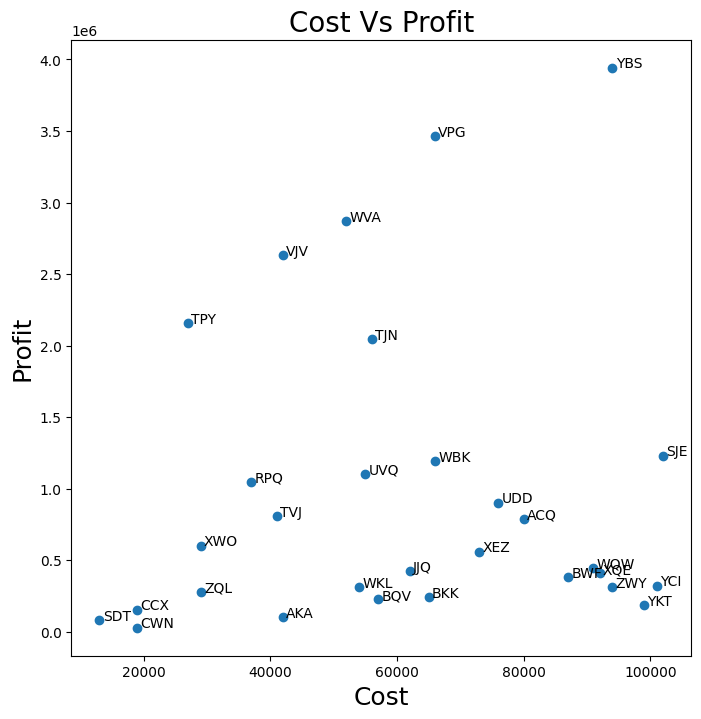

In [53]:
plt.figure(figsize=(8, 8))
plt.scatter(summary_df['Avg Annual Cost'], summary_df['Total Profit'])
plt.title('Cost Vs Profit', fontsize=20)
plt.xlabel('Cost', fontsize=18)
plt.ylabel('Profit', fontsize=18)
for i, name in enumerate(weeklyvisitors.columns):
    plt.annotate(name, (summary_df['Avg Annual Cost'][i] + 500, summary_df['Total Profit'][i]))
plt.show()


To strongly justify the above claims,a radar plot is created.

First, choosing appropriate parameters to create a new temporary dataframe

In [54]:
#first selecting only required attributes for dataframe
selected_dimensions = ['Avg.Age','Total Profit', 'TotalVisits','Total Revenue','CinemaCapacity','Avg Annual Cost']


summary_df_radar = summary_df[selected_dimensions]
#now normalising data (scaling values from 0 to 1)
normalised_data = summary_df_radar / summary_df_radar.max()
print(normalised_data.head())

      Avg.Age  Total Profit  TotalVisits  Total Revenue  CinemaCapacity  \
VPG  0.733333      0.878274     0.874172       0.874172        0.329738   
XQE  0.622222      0.103126     0.146676       0.123517        0.077042   
XWO  0.755556      0.152509     0.164817       0.156142        0.192604   
JJQ  0.733333      0.106842     0.151637       0.119714        0.060092   
WBK  0.777778      0.302731     0.494050       0.312032        0.602465   

     Avg Annual Cost  
VPG         0.647059  
XQE         0.901961  
XWO         0.284314  
JJQ         0.607843  
WBK         0.647059  


For Radar Plot

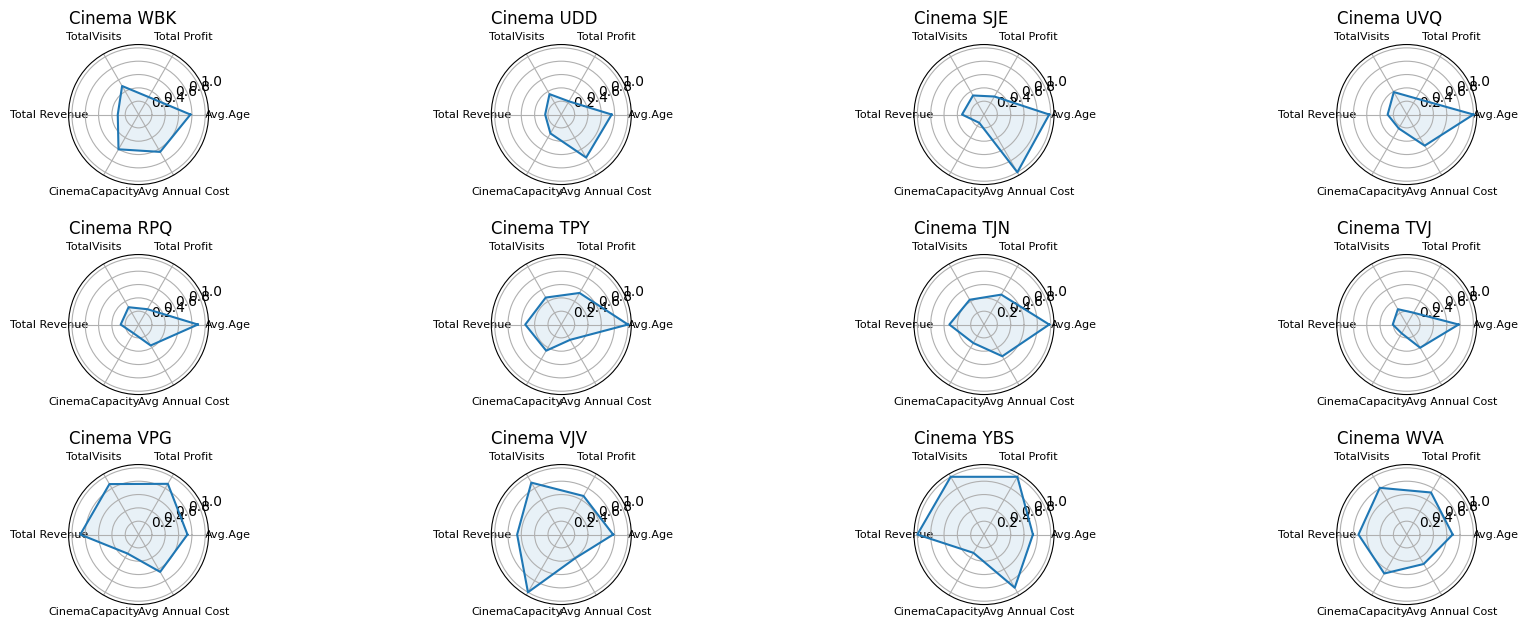

In [55]:
selected=['WBK', 'UDD','SJE','UVQ','RPQ','TPY','TJN','TVJ','VPG', 'VJV', 'YBS', 'WVA']
n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
plt.figure(figsize=(15, 20))
counter = 1

for name in selected:

    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub = plt.subplot(4, 4, counter, polar=True)
    sub.plot(angles, values)
    sub.fill(angles, values, alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([.2, .4, .6, .8, 1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalised_data.columns, fontsize=8)
    sub.set_title('Cinema ' + name, fontsize=12, loc='left')
    counter += 1
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.gcf().set_size_inches(20,10)
plt.show()

This radar plot is indeed a insightful visualisation where the upper part of the radar is considered a positive measure consisting Revenue, Total Visits and Profit. Therefore cinemas VJV and VPG are very profitable cinemas.

Now using bubble plot to see four important cinemas VJV and VPG(from high volume group) and (WBK and YBS from medium group

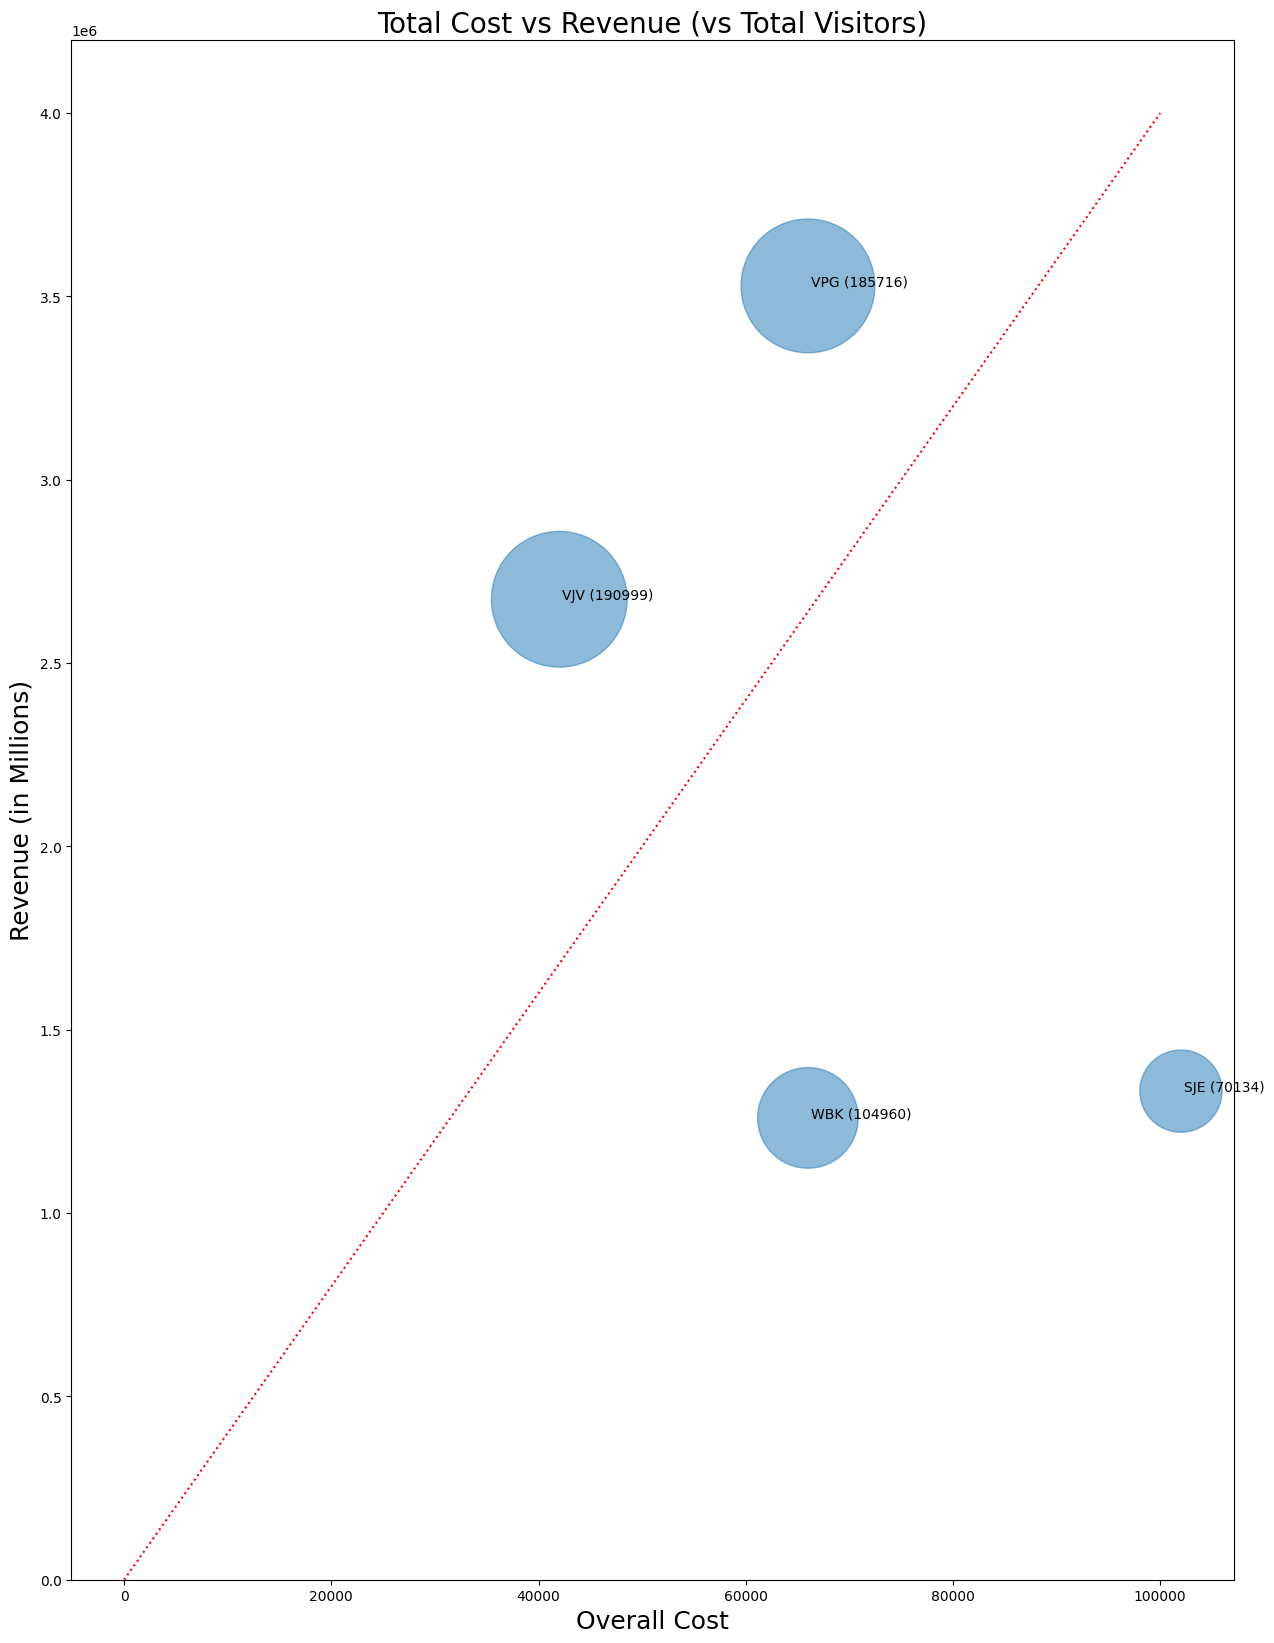

In [56]:
selected=['SJE','WBK','VJV','VPG']

summary_df_bubble=summary_df.loc[selected]
summary_df_bubble['BubbleSize'] = summary_df_bubble['TotalVisits']/20  #for making bubble sizes little smaller

plt.figure(figsize=(15, 20))
plt.scatter(summary_df_bubble['Avg Annual Cost'], summary_df_bubble['Total Revenue'], s=summary_df_bubble['BubbleSize'], alpha=0.5)
plt.title('Total Cost vs Revenue (vs Total Visitors)', fontsize=20)
plt.xlabel('Overall Cost', fontsize=18)
plt.ylabel('Revenue (in Millions)', fontsize=18)
for i, name in enumerate(summary_df_bubble.index):
    if name in selected:
        plt.annotate(name + ' (' + str(int(summary_df_bubble['TotalVisits'][i])) + ')',
                     (summary_df_bubble['Avg Annual Cost'][i] + 300, summary_df_bubble['Total Revenue'][i]))



plt.plot([0, 100000], [0, 4000000], linestyle=':', color='r', label='Revenue = Cost (zero profit)')
#plt.text(50000, 2000000, 'Revenue = Cost (zero profit)', color='red')
plt.ylim(ymin=0)
plt.show()

Here the line is considered as zero profit line where cost = revenue so any cinemas lying on tthe upper half is profitable one whereas any cinemas lying in the bottom one is not so profitable.

Now, as part of the course work requirement, trying out some of the interactive plots for better understanding.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
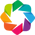

:Overlay
   .NdOverlay.I                  :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Curve.Trend_hyphen_minus_WBK :Curve   [x]   (y)
   .Curve.Trend_hyphen_minus_UDD :Curve   [x]   (y)
   .Curve.Trend_hyphen_minus_SJE :Curve   [x]   (y)
   .Curve.Trend_hyphen_minus_UVQ :Curve   [x]   (y)
   .Curve.Trend_hyphen_minus_RPQ :Curve   [x]   (y)
   .Curve.Trend_hyphen_minus_TPY :Curve   [x]   (y)
   .Curve.Trend_hyphen_minus_TJN :Curve   [x]   (y)
   .Curve.Trend_hyphen_minus_TVJ :Curve   [x]   (y)

In [57]:
import pandas as pd
import hvplot.pandas
import numpy as np
import holoviews as hv
hv.extension('bokeh')


period = 4
rolling_average = weeklyvisitors.rolling(window=period).mean()

selected=['WBK', 'UDD','SJE','UVQ','RPQ','TPY','TJN','TVJ']
colors = ['blue', 'green','orange','red','yellow','pink','brown','purple']

# Create a Holoviews overlay for the rolling average and trend lines
rolling_avg_plot = rolling_average[selected].hvplot.line(
    frame_height=500, frame_width=500,
    xlabel='Date', ylabel='Total Visits',
    title='Medium volume Cinemas with Monthly Rolling Average',
    line_width=2,
    color=colors,
    grid=True
)

trend_lines = []
for i, name in enumerate(selected):
    x = np.arange(len(weeklyvisitors[name]))
    z = np.polyfit(x, weeklyvisitors[name], 1)
    trend = np.poly1d(z)
    trend_line = hv.Curve((weeklyvisitors.index, trend(x)), label=f'Trend - {name}')
    trend_line = trend_line.opts(line_dash='dashed', color=colors[i])
    trend_lines.append(trend_line)

trend_lines_plot = hv.Overlay(trend_lines)


plot = rolling_avg_plot * trend_lines_plot


plot


Instead of focusing on the entire medium or high volume group, I wanted to focus on particular cinemas for comparative analysis and insightful conclusions

Now trying interactive bubble plots. Here, the total visits is divided by 20 to make bubbles bit smaller in size

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
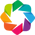

/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning: 'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.
  value = param_value_if_widget(value)


:Overlay
   .Scatter.I              :Scatter   [Avg Annual Cost]   (Total Revenue,BubbleSize,index,TotalVisits,Avg.Age,CinemaCapacity,Avg Annual MarketingCost,Avg Annual OverheadsCost,AverageSpend,Total Profit)
   .Curve.Zero_profit_line :Curve   [x]   (y)

In [58]:
import pandas as pd
import holoviews as hv
hv.extension('bokeh')

selected=['SJE','WBK','VJV','VPG']

summary_df_bubble = summary_df.loc[selected]
summary_df_bubble['BubbleSize'] = summary_df_bubble['TotalVisits'] / 20  # for making bubble sizes smaller


tooltips = [
    ('Cinema', '@index'),
    ('Total Visits', '@TotalVisits{0,0}')
]


scatter_plot = summary_df_bubble.hvplot.scatter( frame_height=500, frame_width=500,
    title='Total Cost Vs Revenue (vs Total Visitors)',
    xlabel='Overall Cost', ylabel='Revenue(in millions)',
    alpha=0.5, padding=0.1, hover_cols='all',
    tools=['pan', 'box_zoom', 'wheel_zoom', 'undo', 'redo', 'hover', 'save', 'reset'],
    x='Avg Annual Cost', y='Total Revenue', size='BubbleSize'
)

zero_profit_line = hv.Curve([(0, 0), (100000, 4000000)], label='zero profit line').opts(line_dash='dashed', line_width=0.5, color='red')

plot = scatter_plot * zero_profit_line


plot


Here, just by hovering on the bubble, which represnts cinemas we can view all the information about the cinema; the cost, revenue, total visits etc.

And finally using interactive heat map

/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning: 'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.
  value = param_value_if_widget(value)
/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning: 'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.
  value = param_value_if_widget(value)
/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning: 'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.
  value = param_value_if_widget(value)
/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning: 'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.
  value = param_value_if_widget(value)
/usr/local/lib/python3.10/dist-p

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
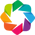

:HeatMap   [columns,index]   (value)

In [59]:
plot = summary_df.corr().hvplot.heatmap(
    frame_height=500, frame_width=500,
    title='Dimension correlations',
    rot=90, cmap='coolwarm'
).opts(invert_yaxis=True, clim=(-1, 1))
hv.extension('bokeh')
plot


Here, if we zoom into the heat map, we can choose to focus on only relatable parameters, in our case Cinema Capacity, Revenue and Cost